In [1]:
import h5py
import matplotlib
import numpy as np
import sys
from matplotlib import pyplot as plt

import astropy.units as u
import pandas as pd
from astropy.table import Table, Column, join

sys.path.insert(1, '/home/ksf293/anomalies-GAN-HSC/analysis')
import utils
import plotter

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
from matplotlib import pylab
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 200
params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'large',
         'axes.titlesize': 'large',
         'xtick.labelsize': 'large',
         'ytick.labelsize': 'large'}
pylab.rcParams.update(params)

In [3]:
#imtag = 'gri_lambda0.3_3sigd'
#tag = 'gri_lambda0.3_3sigd'
#aenum = 10000
#imtag = 'gri_1k'
#tag = 'gri_1k_lambda0.3'
#aenum = 1000
imtag = 'gri'
tag = 'gri_lambda0.3'
aenum = 30000
mode = 'reals'
aetag = f'_latent64_{mode}_long_lr1e-4'
savetag = f'_model{aenum}{aetag}'
base_dir = '/scratch/ksf293/anomalies'
results_dir = f'{base_dir}/results'
results_ae_fn = f'{results_dir}/results_aefull_{tag}{savetag}.h5'
results_fn = f'{results_dir}/results_{tag}.h5'
imarr_fn = f'{base_dir}/data/images_h5/images_{imtag}.h5'

In [4]:
imdict_fn = f'{base_dir}/data/idxdicts_h5/idx2imloc_{imtag}.npy'
resdict_fn = f'{base_dir}/data/idxdicts_h5/idx2resloc_{tag}.npy'
idx2imloc = np.load(imdict_fn, allow_pickle=True).item()
idx2resloc = np.load(resdict_fn, allow_pickle=True).item()

In [5]:
aeres = h5py.File(results_ae_fn, 'r')
res = h5py.File(results_fn, 'r')
imarr = h5py.File(imarr_fn, 'r')

## AE reconstructions

In [6]:
def plot_ae_recons(ids, res, score_name='ae_anomaly_scores_sigma', 
                   score_label='$s_\mathrm{{CAE}}$', saveto=None, border_color=None):
    nims = len(ids)
    subsize = 2
    fig, axarr = plt.subplots(3,nims,figsize=(nims*subsize,3*subsize), edgecolor=border_color)
    plt.subplots_adjust(hspace=0.02, wspace=0.1)
    count = 0
    for i in range(nims):
        idx = ids[i]
        
        loc = idx2imloc[idx]
        #im = luptonize(imarr['images'][loc])
        
        
        rloc = idx2resloc[idx]
        im = res['reals'][rloc]
        recon = res['decodeds'][rloc]
        score = float(res[score_name][rloc])
        obj_id = res['object_ids'][rloc]
        #resid = get_residual(im, recon)
        resid = res['residuals'][rloc]
        
        ax0 = axarr[0][i]
        ax1 = axarr[1][i]
        ax2 = axarr[2][i]
        
        sigma = ''
        if 'sigma' in score_name:
            sigma = '$\sigma$'
        title = r'''ID: {}
{} = {:.2f}{}'''.format(obj_id, score_label, score, sigma)
        ax0.set_title(title, fontsize=8)
        ax0.imshow(im)
        ax1.imshow(recon)
        ax2.imshow(resid)
        
        if i==0:
            fsize=13
            ax0.set_ylabel("real",fontsize=fsize)
            ax1.set_ylabel("AE decoded",fontsize=fsize)
            ax2.set_ylabel("residual",fontsize=fsize)
        
        for ax in [ax0, ax1, ax2]:
            ax.set_xticks([])
            ax.set_yticks([])
    
    if border_color is not None:
        fig.patch.set_edgecolor(border_color)  
        fig.patch.set_linewidth('4') 
        
    if saveto:
        plt.savefig(saveto, bbox_inches='tight', edgecolor=border_color)#, pad_inches=0)

In [7]:
def plot_recons(ids, res, score_name='ae_anomaly_scores_sigma', 
                   score_label='$s_\mathrm{{CAE}}$', saveto=None, border_color=None):
    nims = len(ids)
    subsize = 2
    fig, axarr = plt.subplots(3,nims,figsize=(nims*subsize,3*subsize), edgecolor=border_color)
    plt.subplots_adjust(hspace=0.02, wspace=0.1)
    count = 0
    for i in range(nims):
        idx = ids[i]
        
        loc = idx2imloc[idx]
        #im = luptonize(imarr['images'][loc])
        
        
        rloc = idx2resloc[idx]
        im = res['reals'][rloc]
        recon = res['reconstructed'][rloc]
        score = float(res[score_name][rloc])
        obj_id = res['object_ids'][rloc]
        #resid = get_residual(im, recon)
        resid = res['residuals'][rloc]
        
        ax0 = axarr[0][i]
        ax1 = axarr[1][i]
        ax2 = axarr[2][i]
        sigma = ''
        if 'sigma' in score_name:
            sigma = '$\sigma$'
        title = r'''ID: {}
{} = {:.2f}{}'''.format(obj_id, score_label, score, sigma)
        ax0.set_title(title, fontsize=8)
        ax0.imshow(im)
        ax1.imshow(recon)
        ax2.imshow(resid)
        
        if i==0:
            fsize=13
            ax0.set_ylabel("real",fontsize=fsize)
            ax1.set_ylabel("reconstructed",fontsize=fsize)
            ax2.set_ylabel("residual",fontsize=fsize)
        
        for ax in [ax0, ax1, ax2]:
            ax.set_xticks([])
            ax.set_yticks([])
    
    if border_color is not None:
        fig.patch.set_edgecolor(border_color)  
        fig.patch.set_linewidth('4') 
        
    if saveto:
        plt.savefig(saveto, bbox_inches='tight', edgecolor=border_color)#, pad_inches=0)

In [8]:
imtag = 'gri'
tag = 'gri_lambda0.3'
results_fn = f'{base_dir}/results/results_{tag}.h5'
res = h5py.File(results_fn, 'r')
scores = res['anomaly_scores_sigma'][:]
idxs = res['idxs'][:]
n_recons = 3

## Understanding CAE vs WGAN anomaly scores

In [9]:
idx = 0
resid = res['residuals'][idx]
gen_score = res['gen_scores'][idx]
print(np.sum(resid)/255., gen_score)

1774.007843137255 1779.055


In [10]:
resid.shape

(96, 96, 3)

In [11]:
res['residuals'].shape

(942781, 96, 96, 3)

In [12]:
#nres = res['residuals'].shape[0]
nres = 10000
resid_sums_samp = np.empty(nres)
gen_scores_samp = np.empty(nres)
ae_scores_samp = np.empty((nres))
for i in range(nres):
    resid_sums_samp[i] = np.sum(res['residuals'][i])/255.
    gen_scores_samp[i] = res['gen_scores'][i]
    ae_scores_samp[i] = aeres['ae_anomaly_scores'][i]

Text(0, 0.5, 'sum of uint8 residuals')

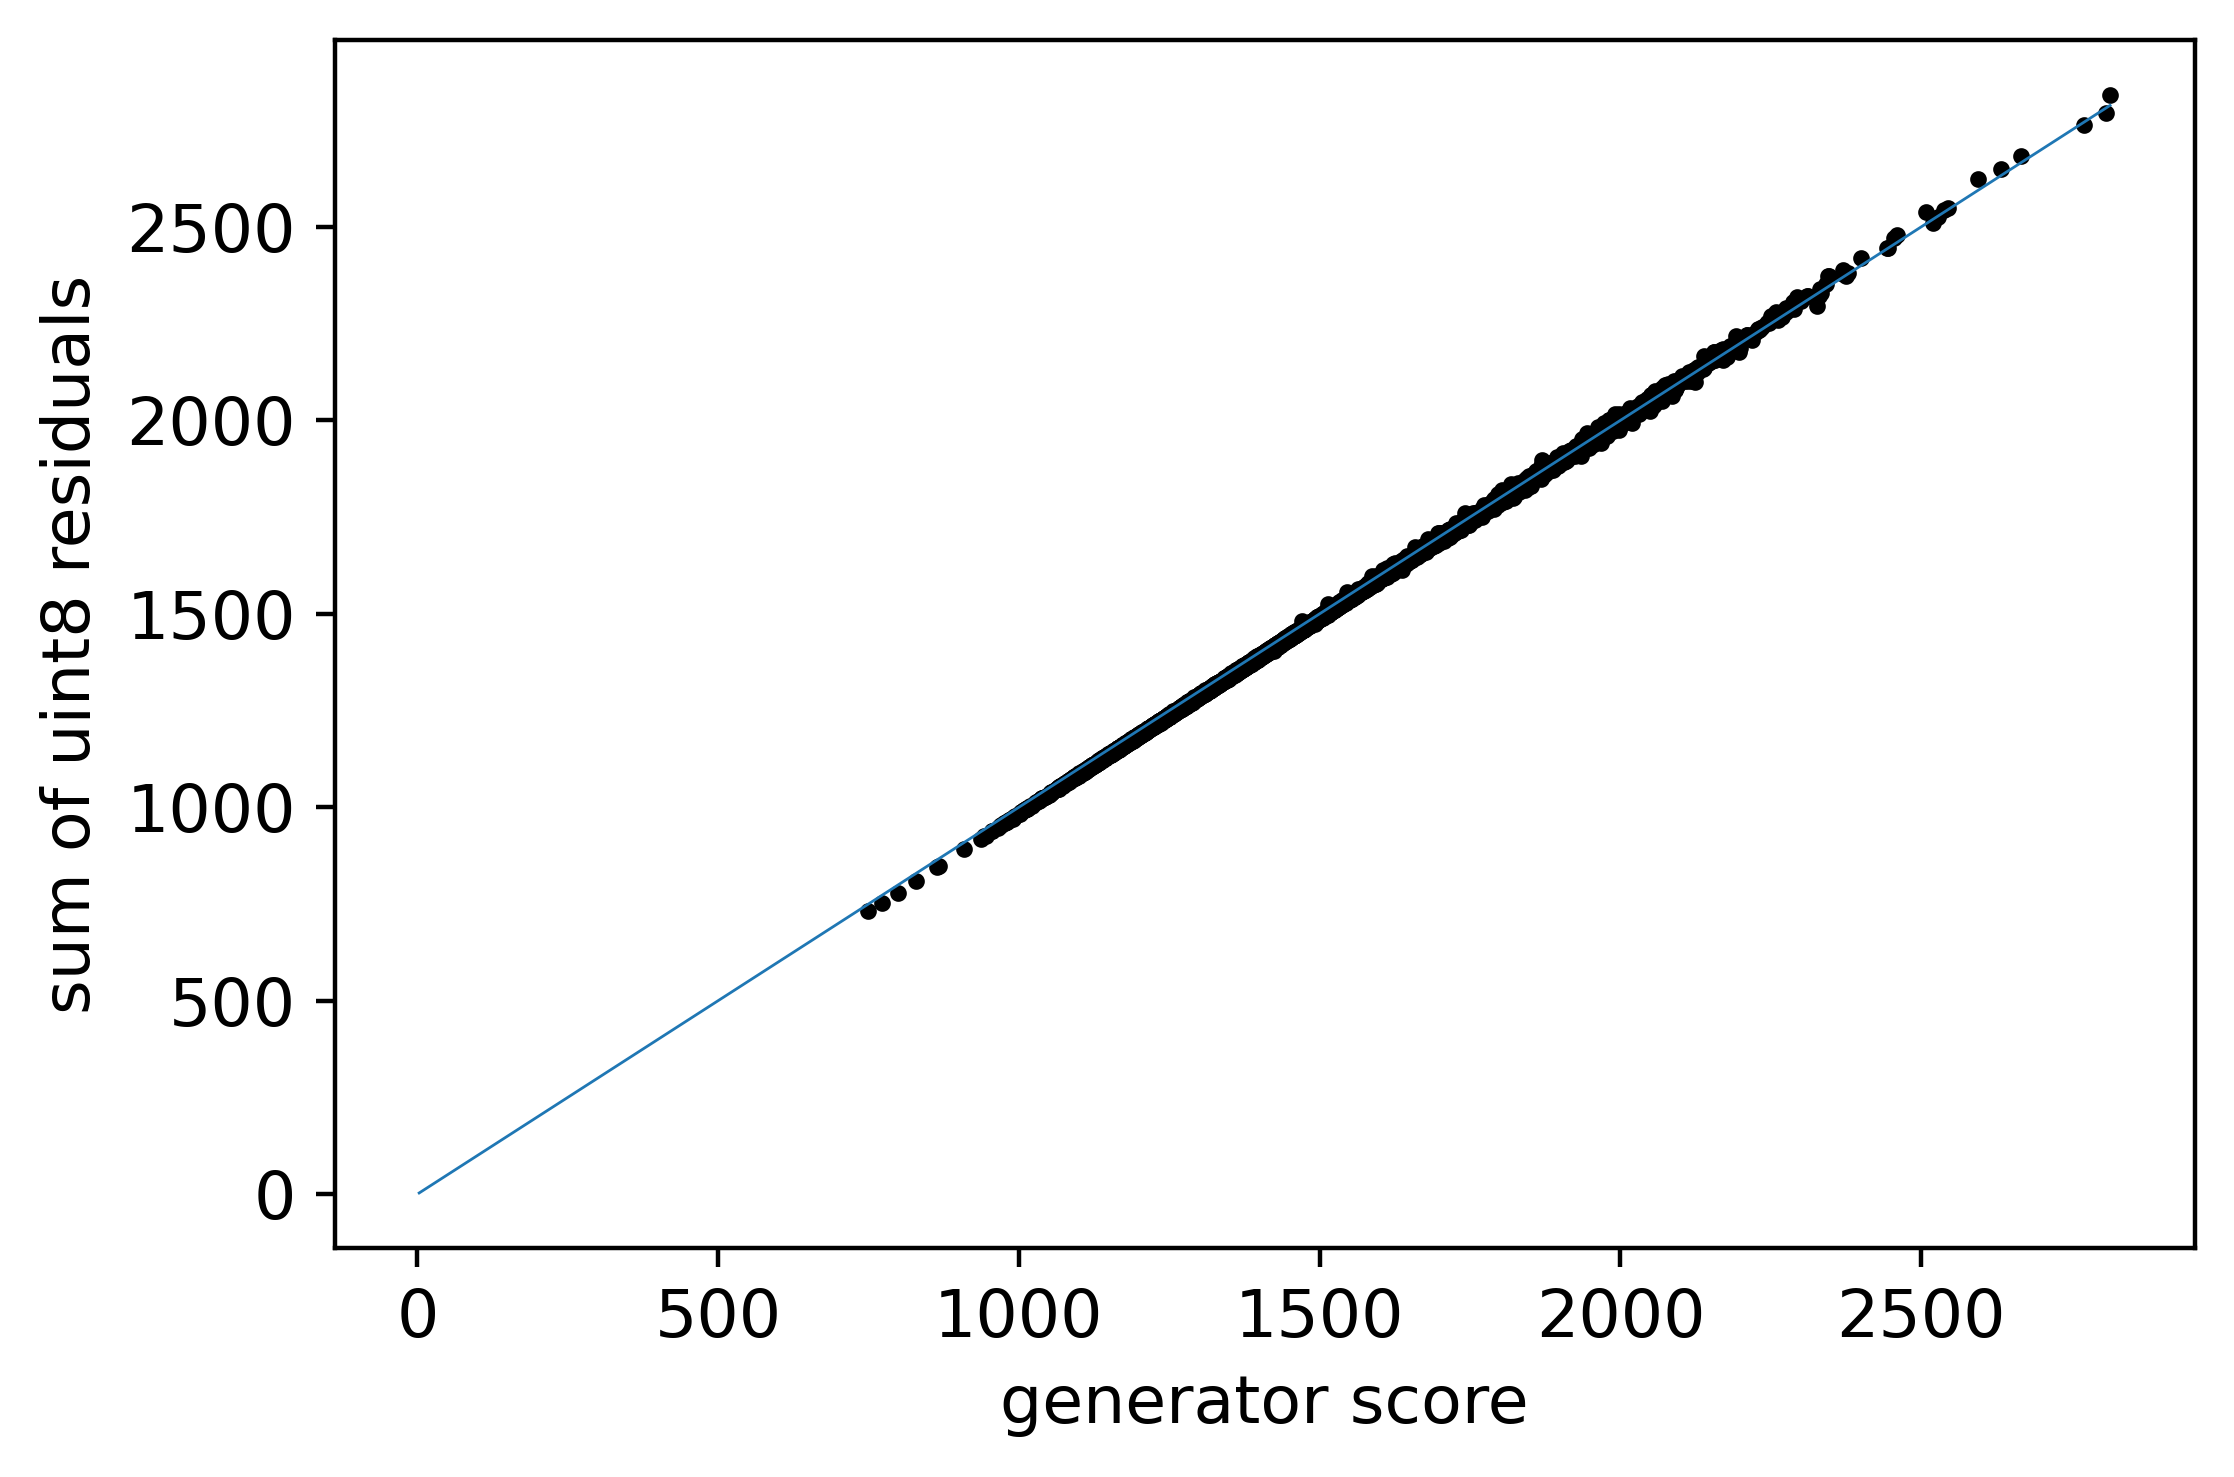

In [13]:
plt.figure()
plt.scatter(gen_scores_samp, resid_sums_samp, color='k', s=4)
minmin = min(min(gen_scores_samp), min(resid_sums_samp)/255.)
maxmax = max(max(gen_scores_samp), max(resid_sums_samp)/255.)
xx = np.linspace(minmin, maxmax, 2)
plt.plot(xx, xx, lw=0.5)
plt.xlabel("generator score")
plt.ylabel("sum of uint8 residuals")

-9.561075086191215


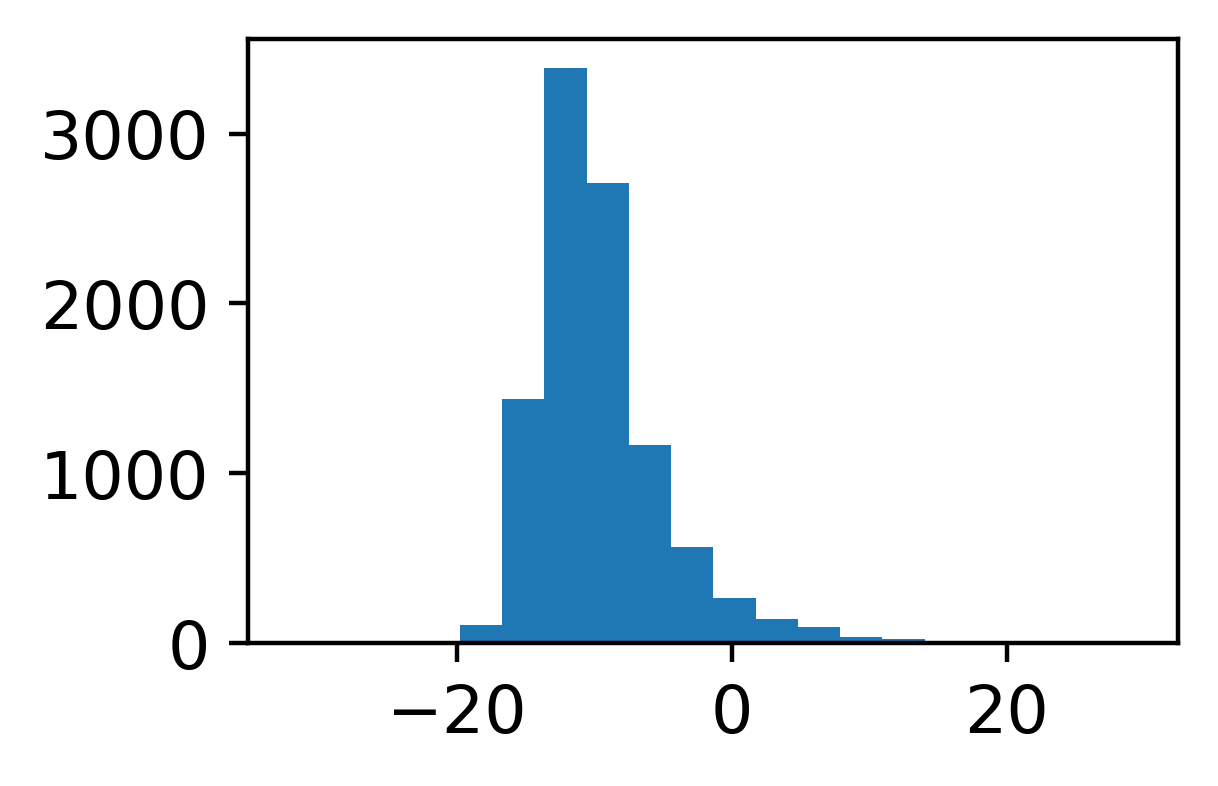

In [14]:
plt.figure(figsize=(3,2))
print(np.mean(resid_sums_samp-gen_scores_samp))
bins = plt.hist(resid_sums_samp-gen_scores_samp, bins=20)

117.84048029710958


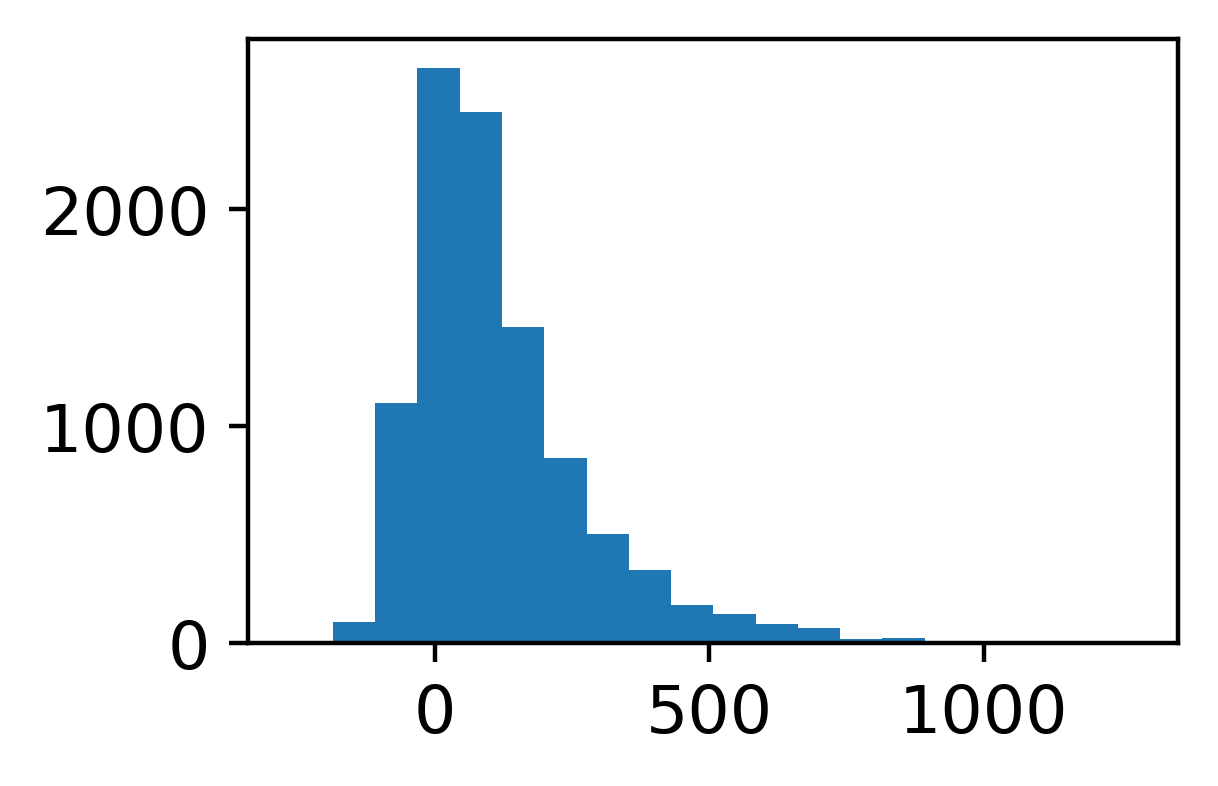

In [15]:
plt.figure(figsize=(3,2))
print(np.mean(resid_sums_samp-ae_scores_samp))
bins = plt.hist(resid_sums_samp-ae_scores_samp, bins=20)

127.40155538330077


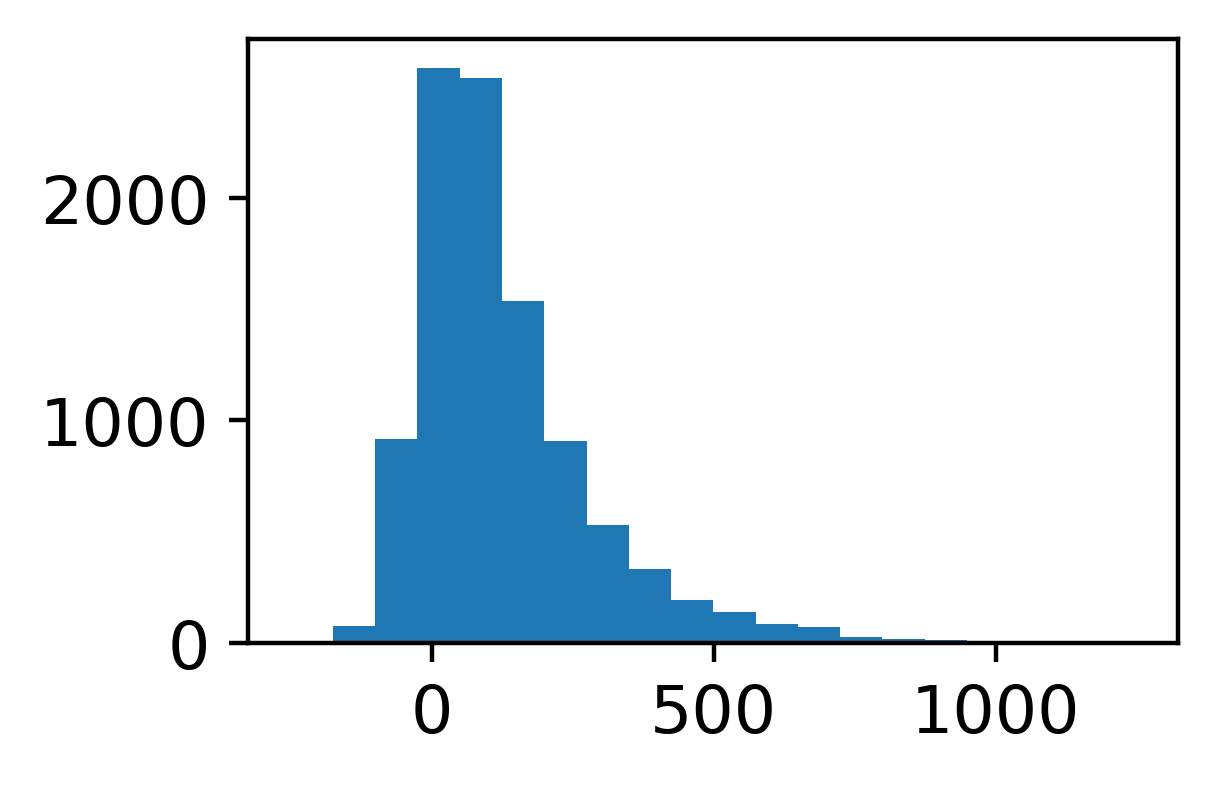

In [16]:
plt.figure(figsize=(3,2))
print(np.mean(gen_scores_samp-ae_scores_samp))
bins = plt.hist(gen_scores_samp-ae_scores_samp, bins=20)

In [17]:
resid_samp = res['residuals'][:nres]
resid_ae_samp = aeres['residuals'][:nres]

resid_score = np.array([np.sum(r) for r in resid_samp])/255.
resid_ae_score = np.array([np.sum(r) for r in resid_ae_samp])/255.

thresh = 50
resid_score_low = np.array([np.sum(r[r < thresh]) for r in resid_samp])/255.
resid_ae_score_low = np.array([np.sum(r[r < thresh]) for r in resid_ae_samp])/255.

NSIDE=96
cl = int(NSIDE/2)-10
cr = int(NSIDE/2)+10
resid_score_cent = np.array([np.sum(r[cl:cr, cl:cr, :]) for r in resid_samp])/255.
resid_ae_score_cent = np.array([np.sum(r[cl:cr, cl:cr, :]) for r in resid_ae_samp])/255.

resid_score_corner = np.array([np.sum(r[:20, :20, :]) for r in resid_samp])/255.
resid_ae_score_corner = np.array([np.sum(r[:20, :20, :]) for r in resid_ae_samp])/255.

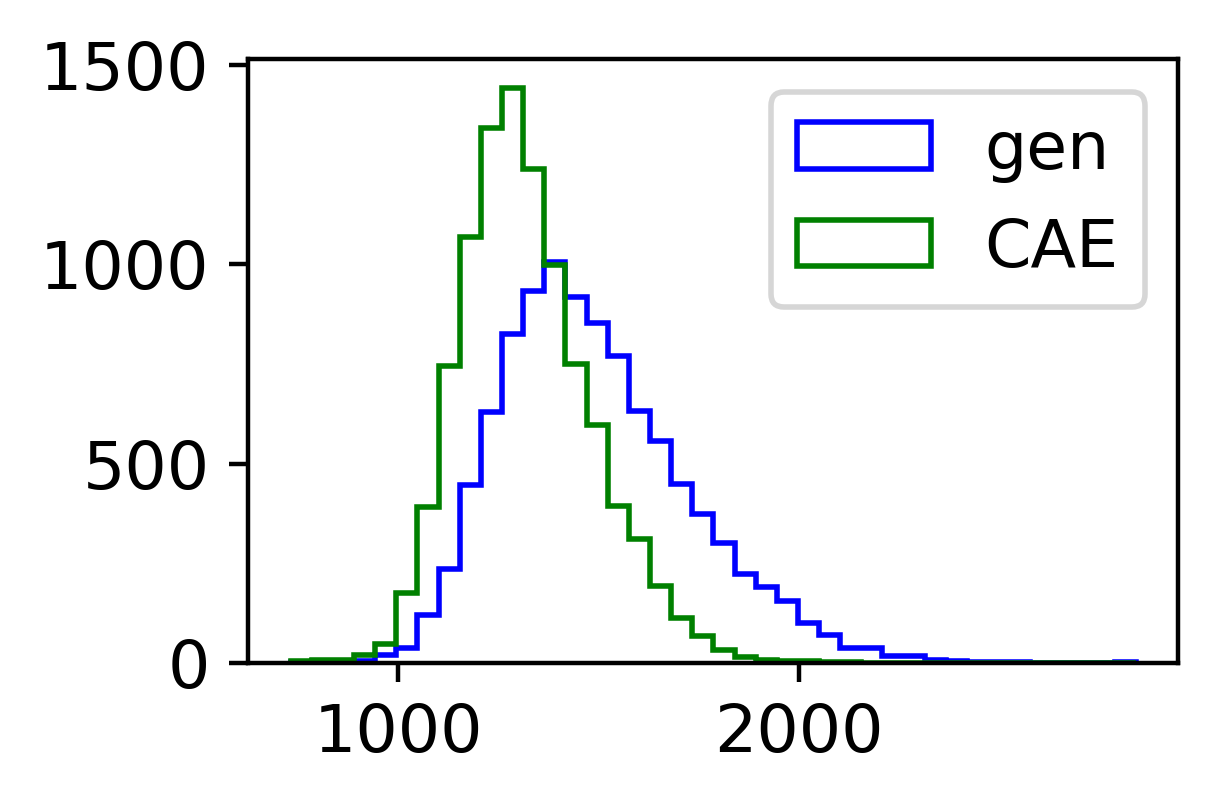

In [18]:
plt.figure(figsize=(3,2))
bins = plt.hist(resid_score, bins=40, label='gen', histtype='step', color='blue')
plt.hist(resid_ae_score, label='CAE', histtype='step', color='green', bins=bins[1])
plt.legend()

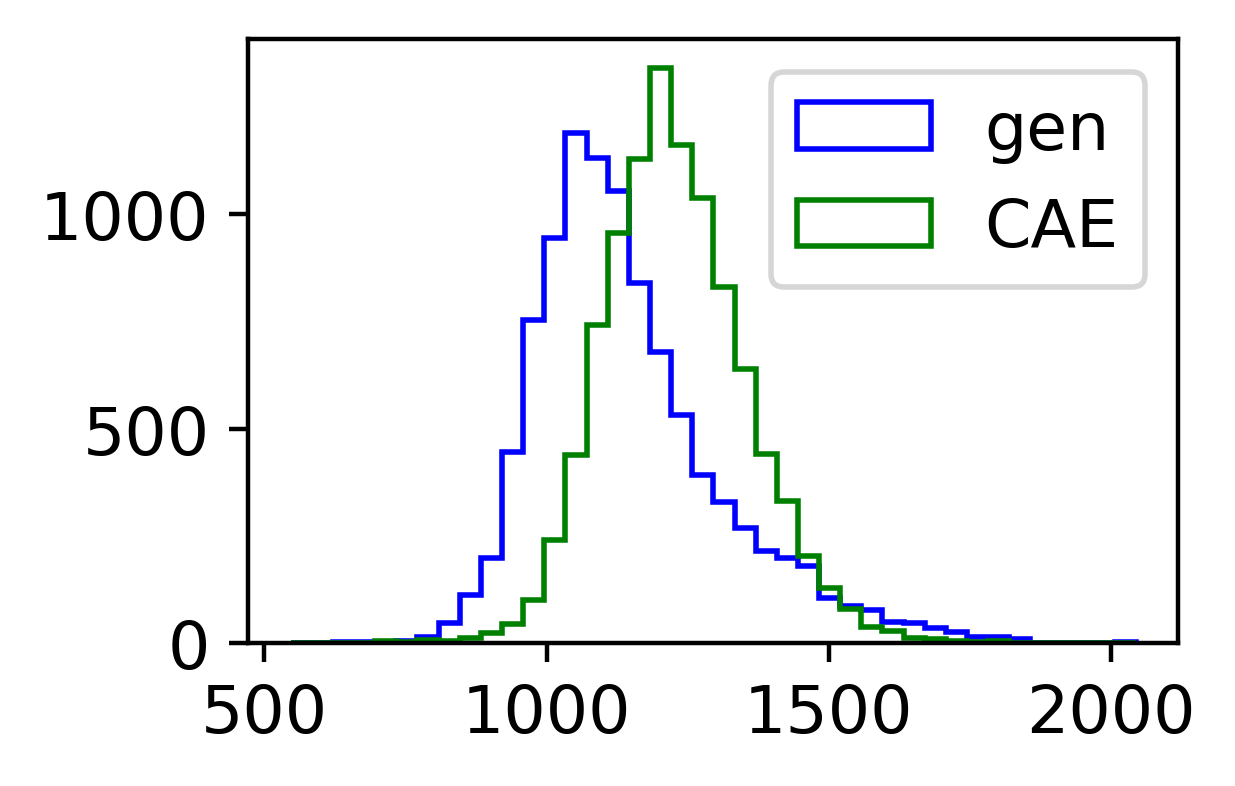

In [19]:
plt.figure(figsize=(3,2))
bins = plt.hist(resid_score_low, bins=40, label='gen', histtype='step', color='blue')
plt.hist(resid_ae_score_low, label='CAE', histtype='step', color='green', bins=bins[1])
plt.legend()

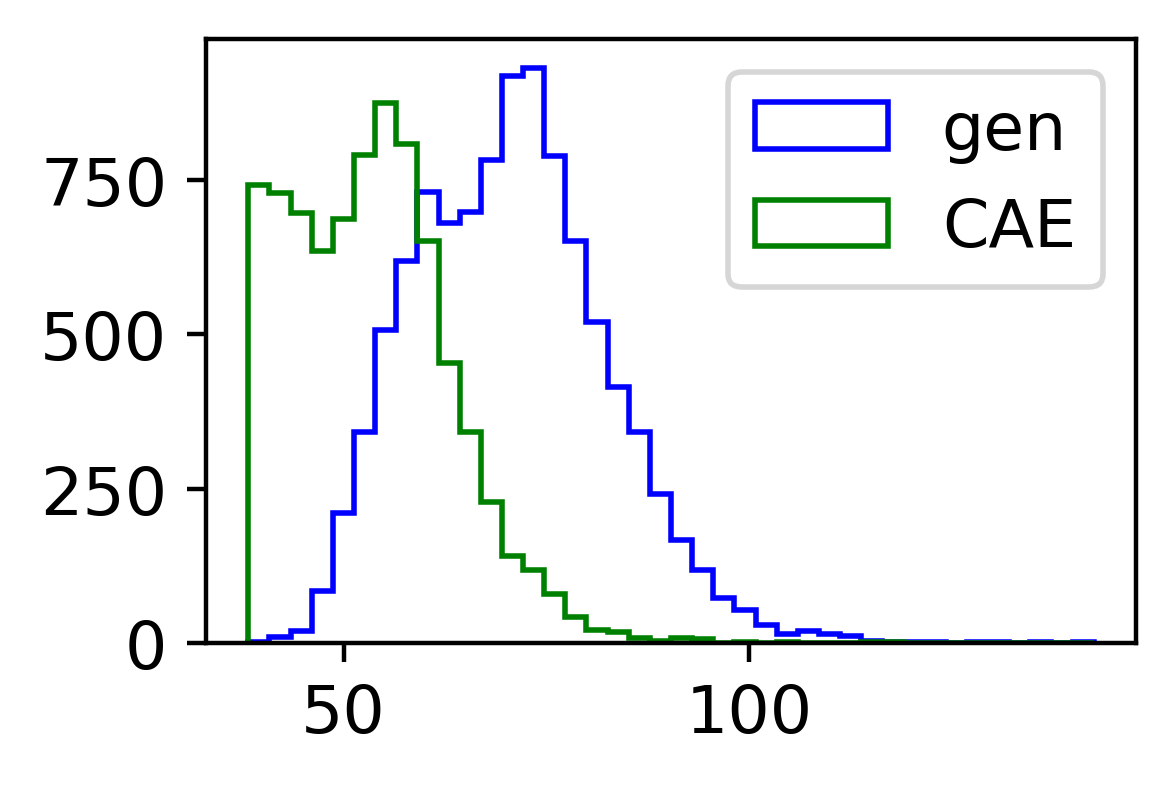

In [20]:
plt.figure(figsize=(3,2))
bins = plt.hist(resid_score_cent, bins=40, label='gen', histtype='step', color='blue')
plt.hist(resid_ae_score_cent, label='CAE', histtype='step', color='green', bins=bins[1])
plt.legend()

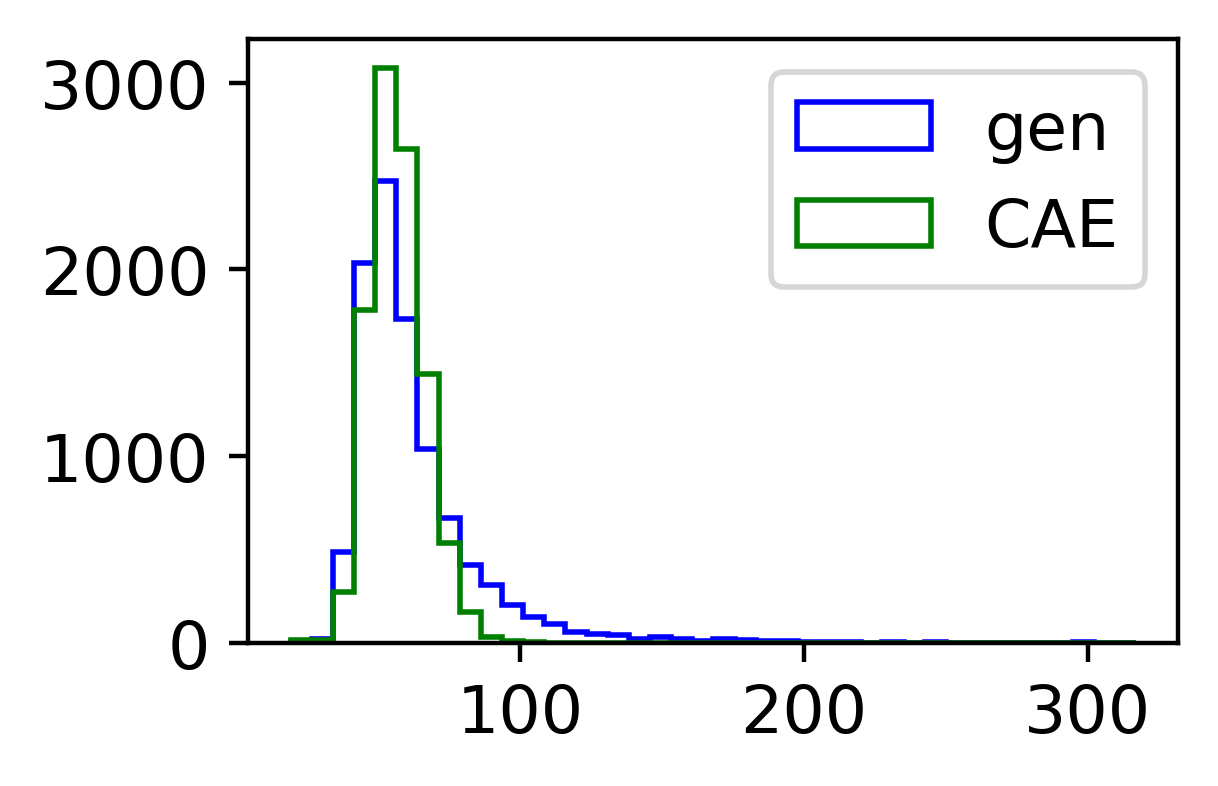

In [21]:
plt.figure(figsize=(3,2))
bins = plt.hist(resid_score_corner, bins=40, label='gen', histtype='step', color='blue')
plt.hist(resid_ae_score_corner, label='CAE', histtype='step', color='green', bins=bins[1])
plt.legend()

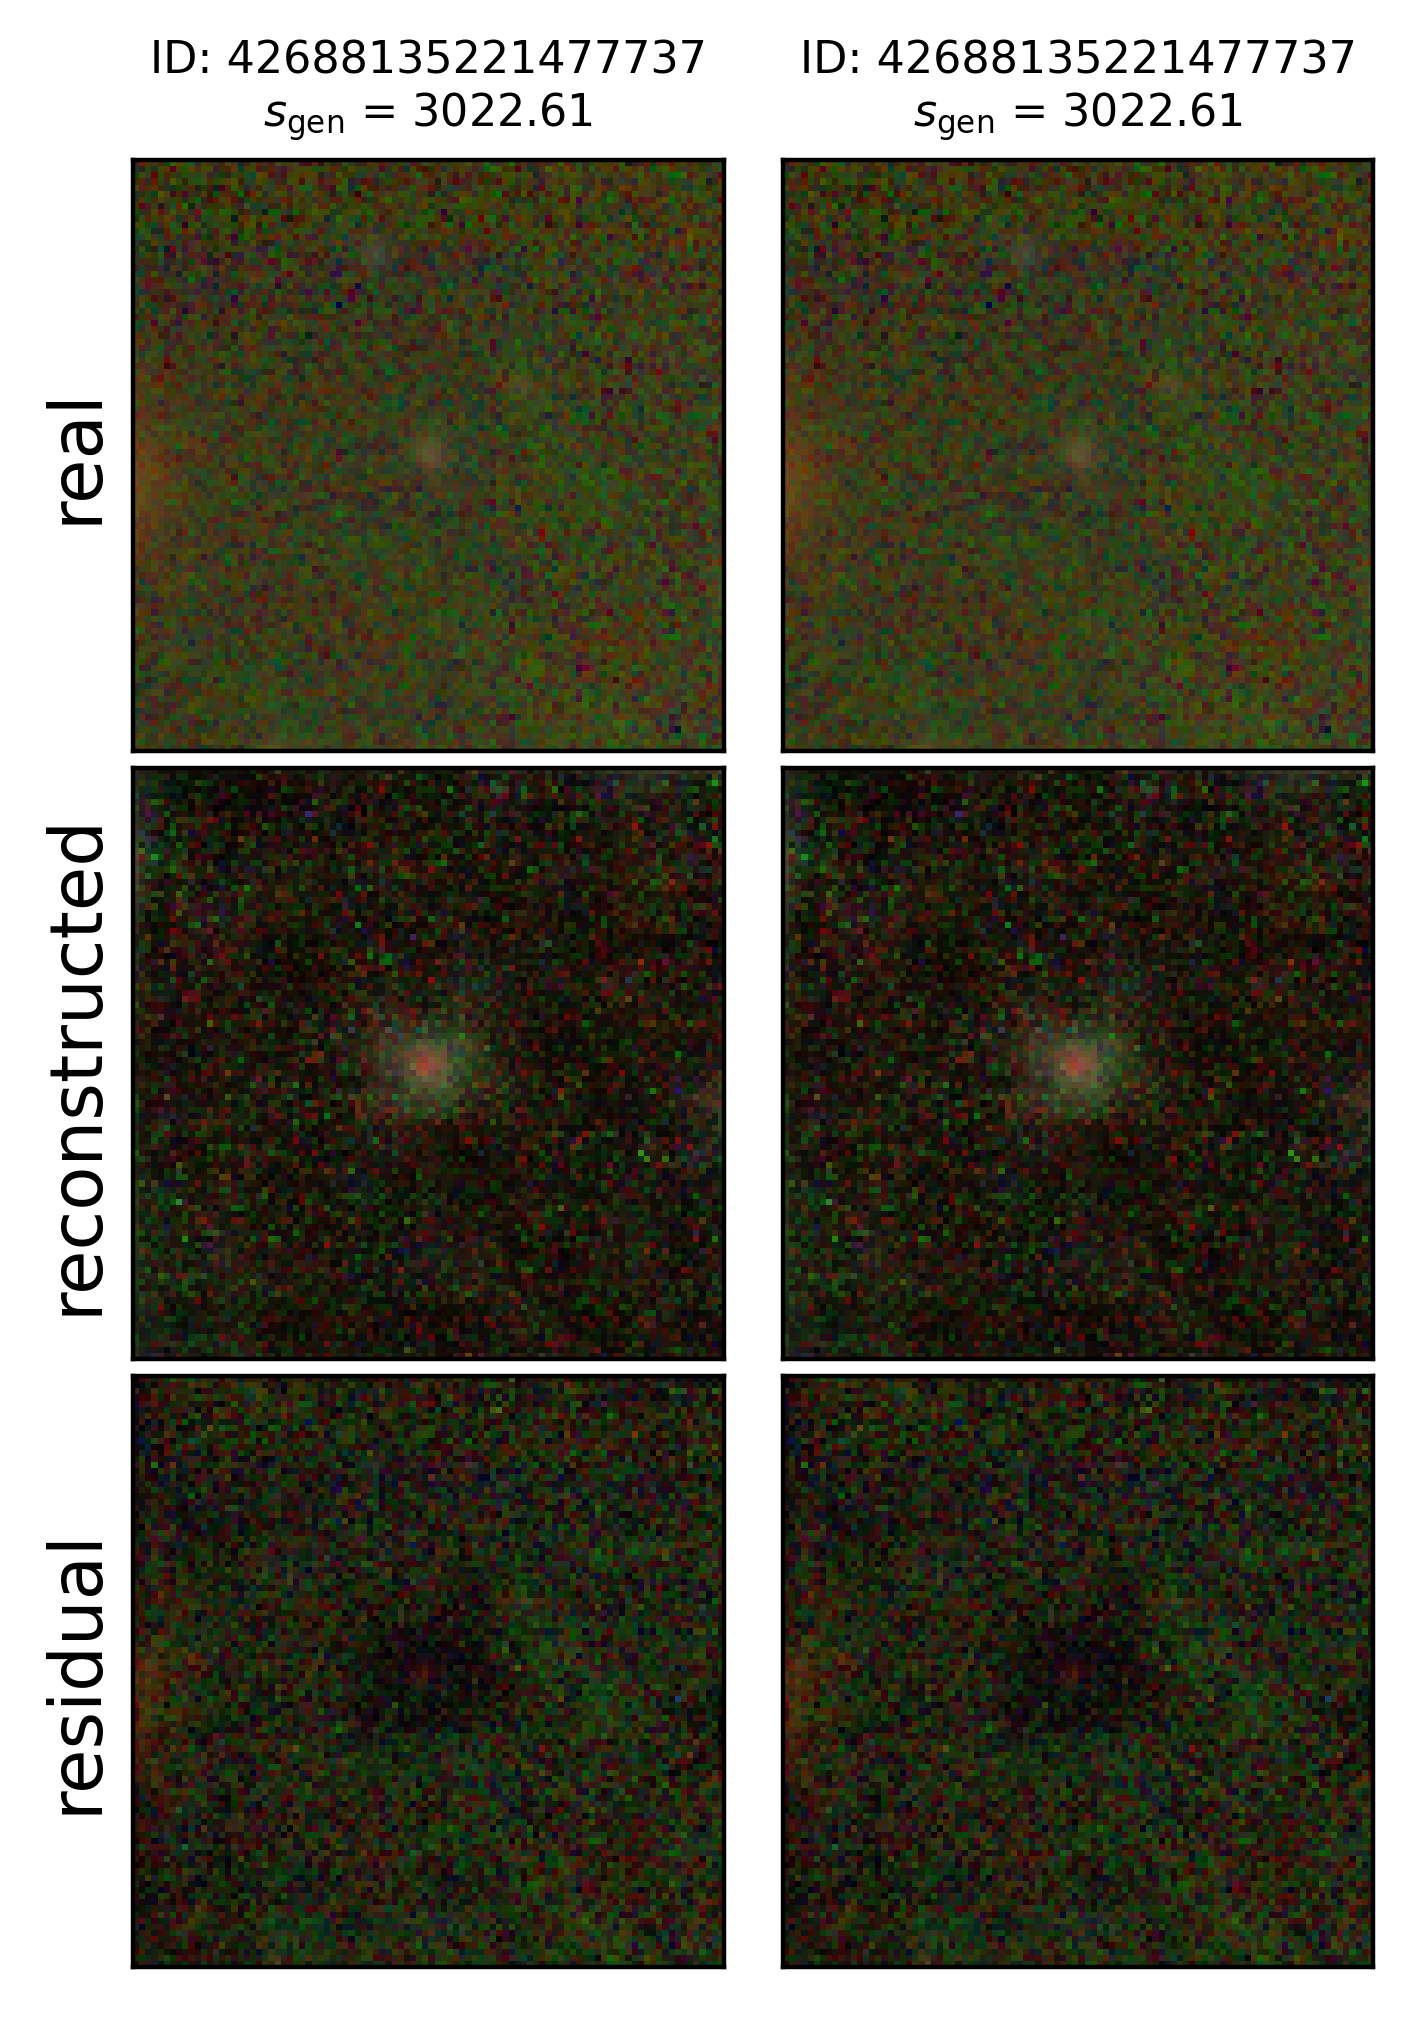

In [22]:
idx = 871822
idxs_recon = [idx, idx]
plot_recons(idxs_recon, res, saveto=None,
                    score_name='gen_scores', score_label='$s_\mathrm{{gen}}$')

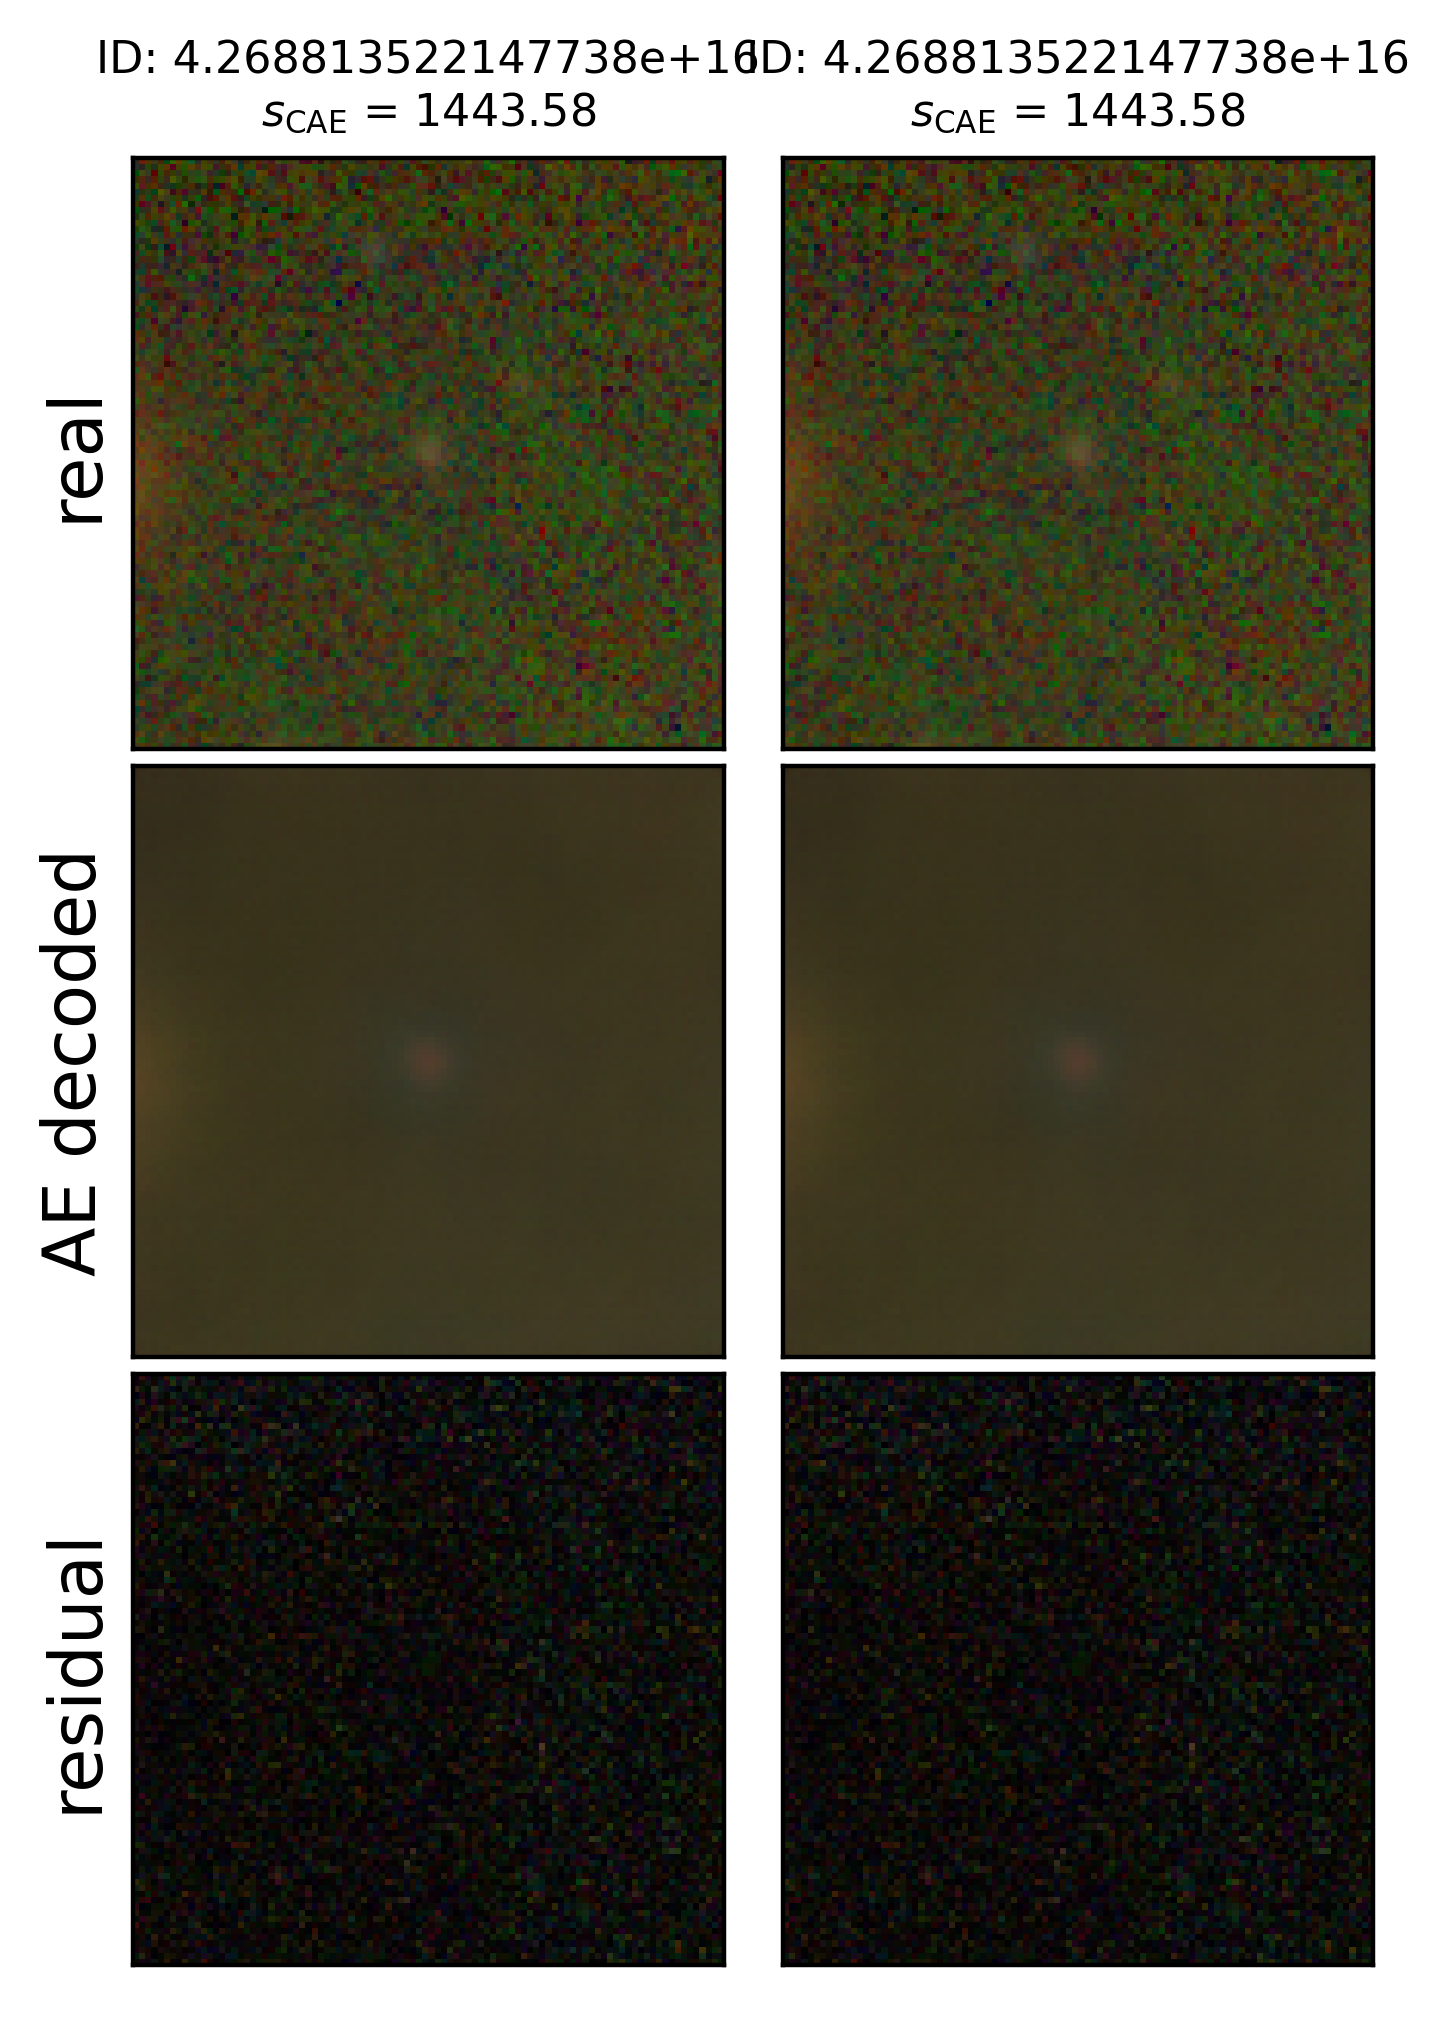

In [23]:
plot_ae_recons(idxs_recon, aeres, saveto=None,
                    score_name='ae_anomaly_scores', score_label='$s_\mathrm{{CAE}}$')

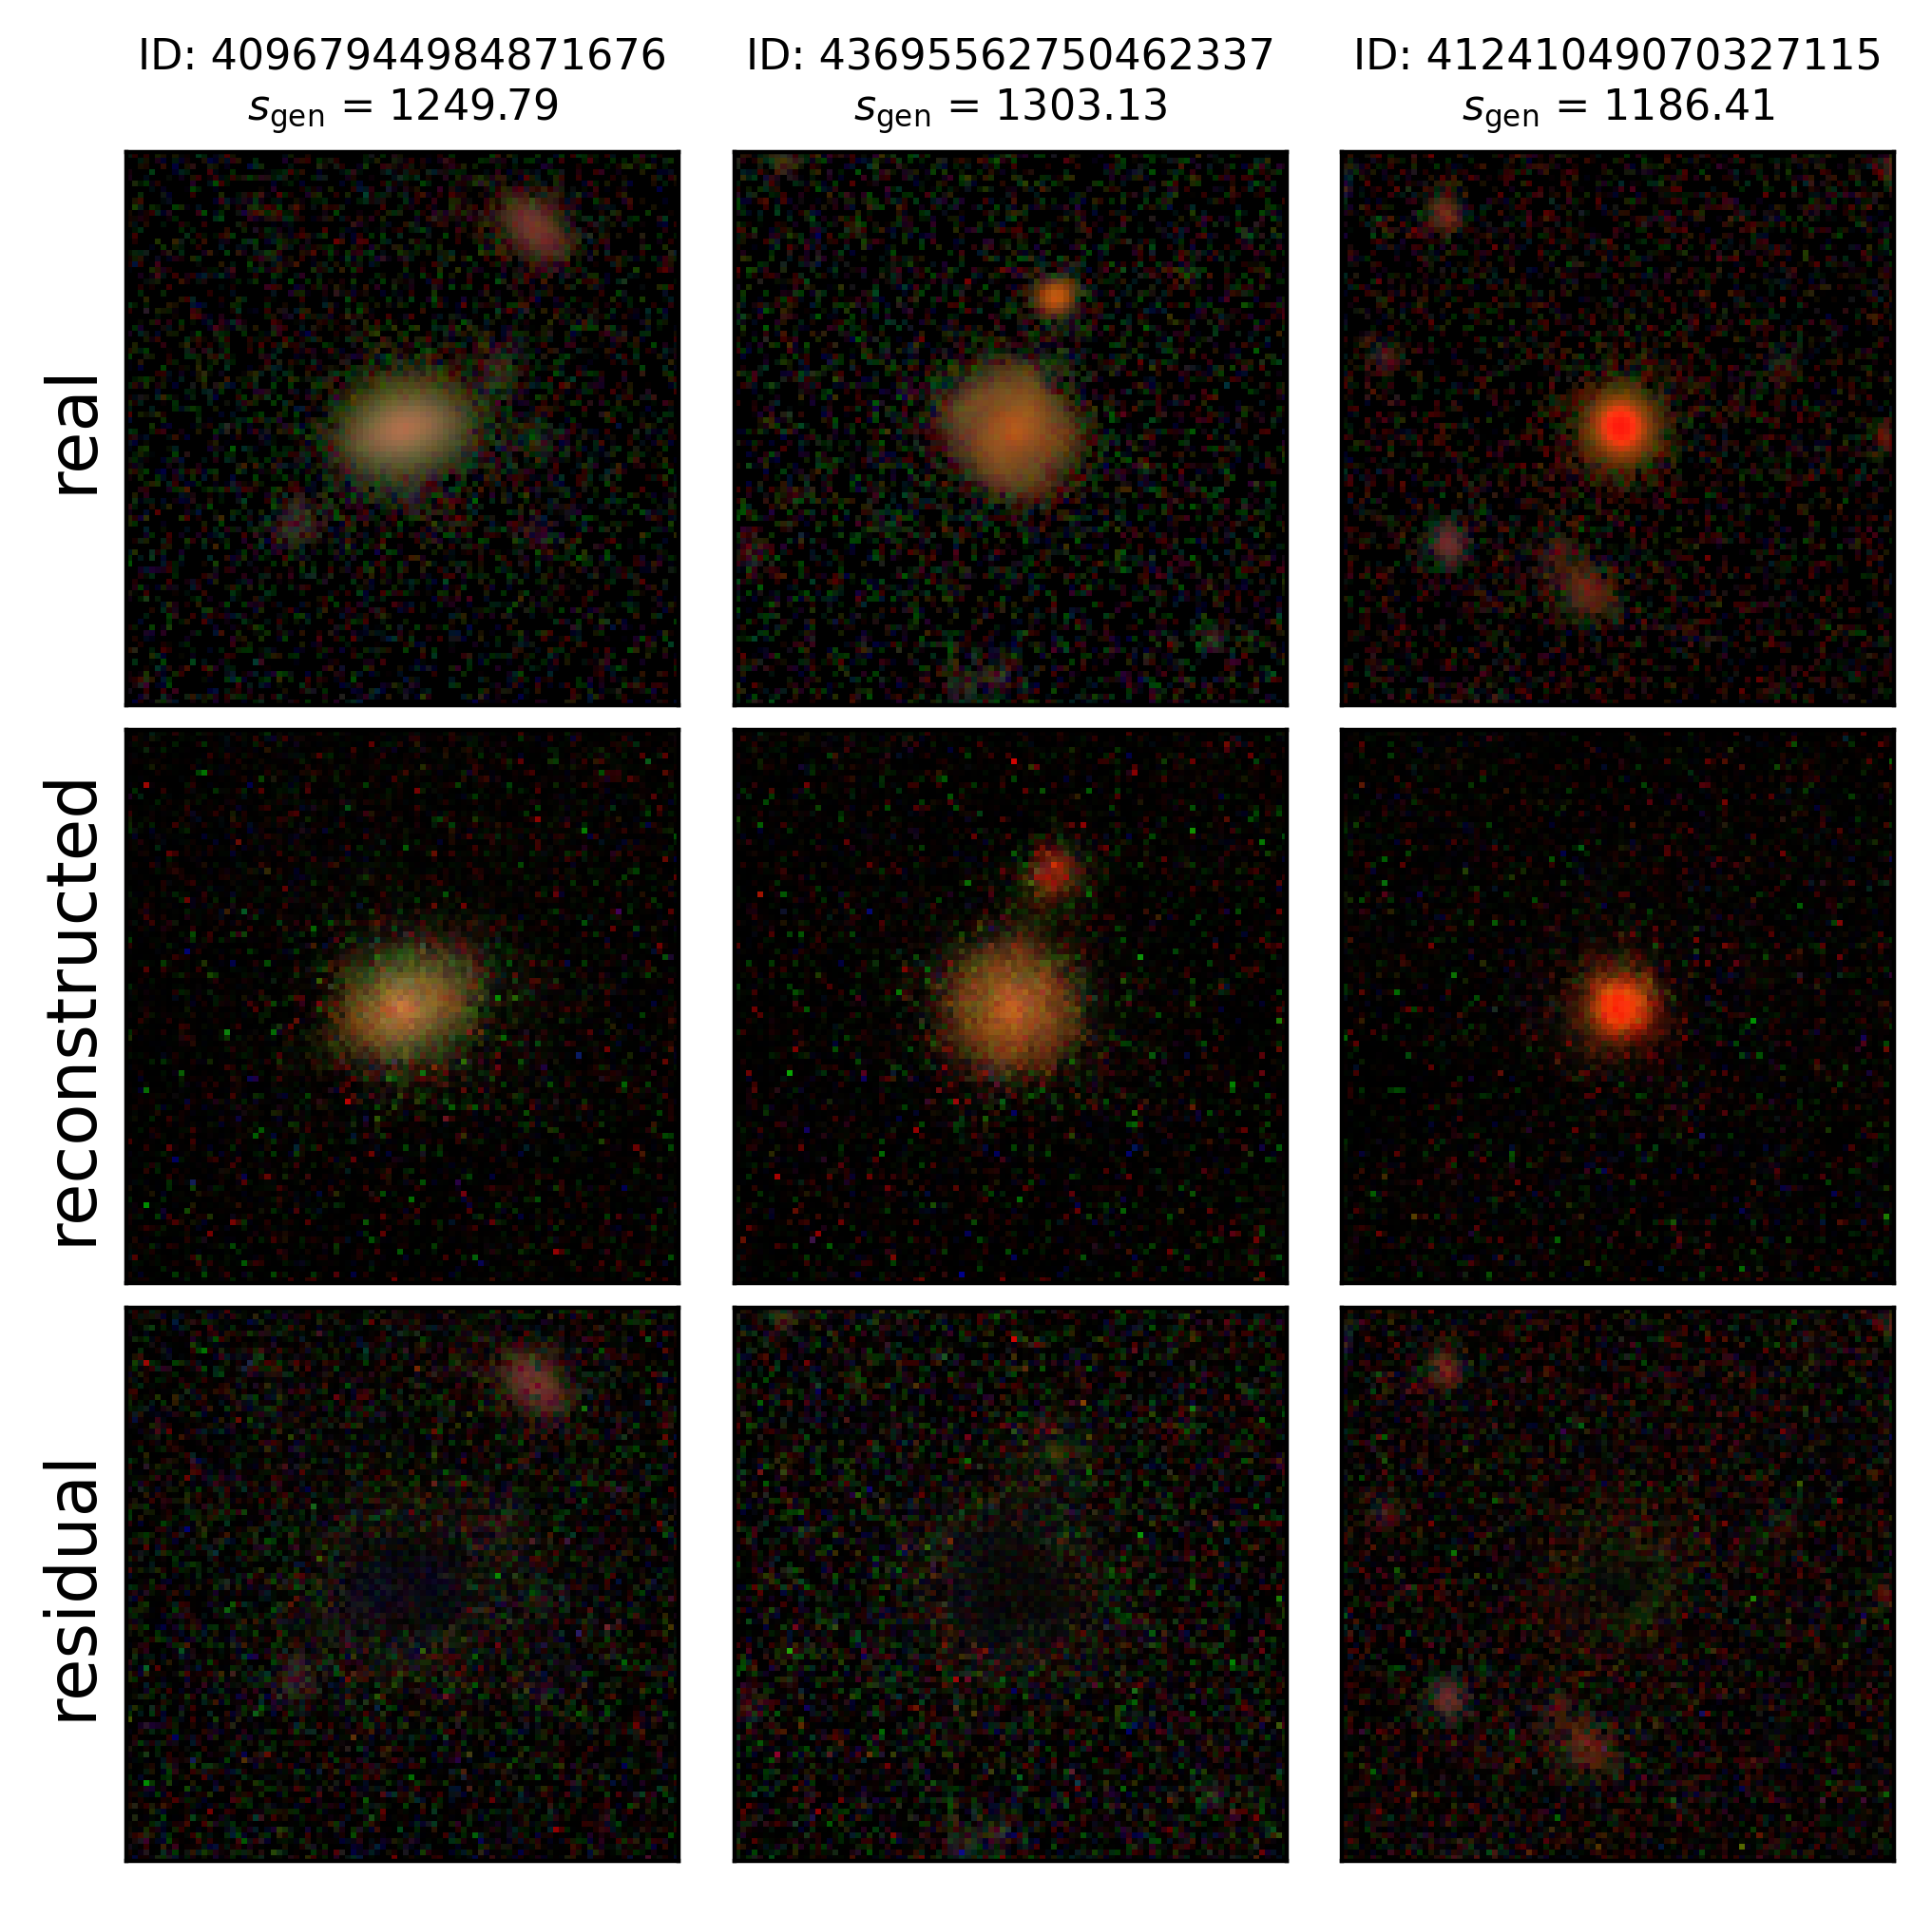

In [24]:
smin, smax = -3, -1
np.random.seed(41)
indices = np.where((scores >= smin) & (scores < smax))[0]
indices_n = np.random.choice(indices, n_recons)
idxs_recon = idxs[indices_n]

plot_recons(idxs_recon, res, saveto=None,
                    score_name='gen_scores', score_label='$s_\mathrm{{gen}}$')

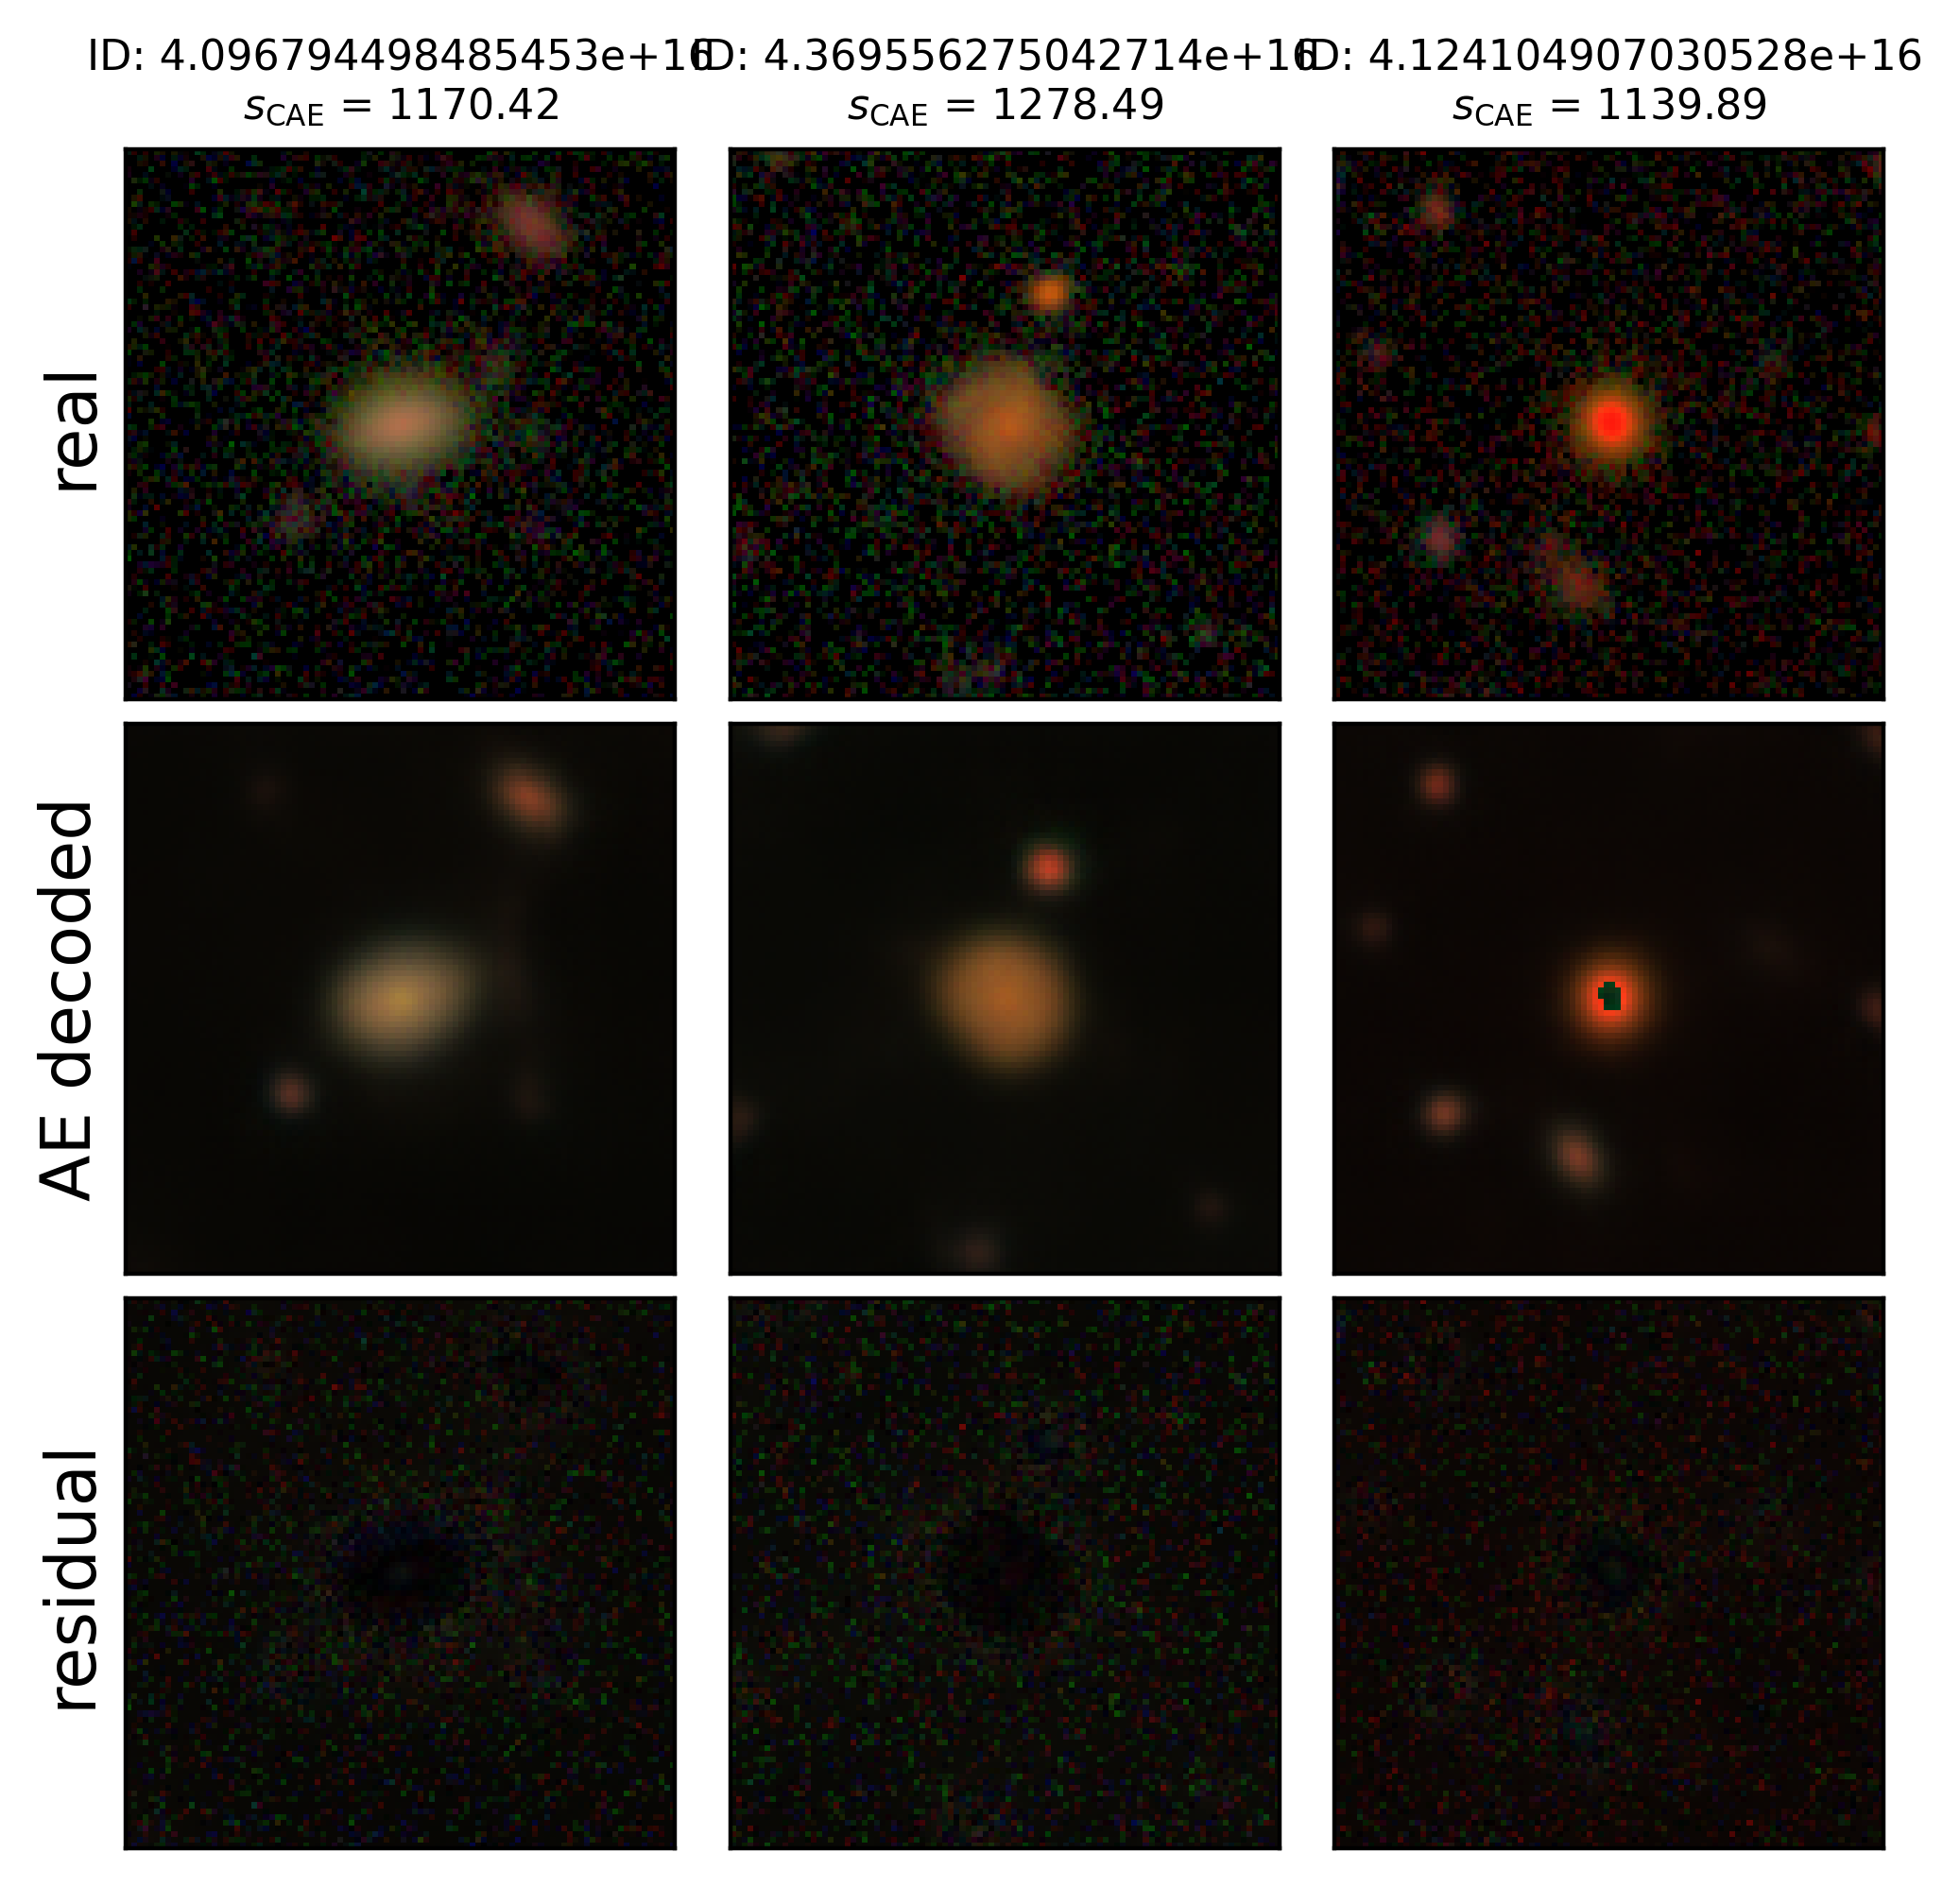

In [25]:
plot_ae_recons(idxs_recon, aeres, saveto=None,
                    score_name='ae_anomaly_scores', score_label='$s_\mathrm{{CAE}}$')

Corner

idx 416048
WGAN: 31637
CAE: 30107
idx 5835
WGAN: 37438
CAE: 35385
idx 585287
WGAN: 55148
CAE: 39285


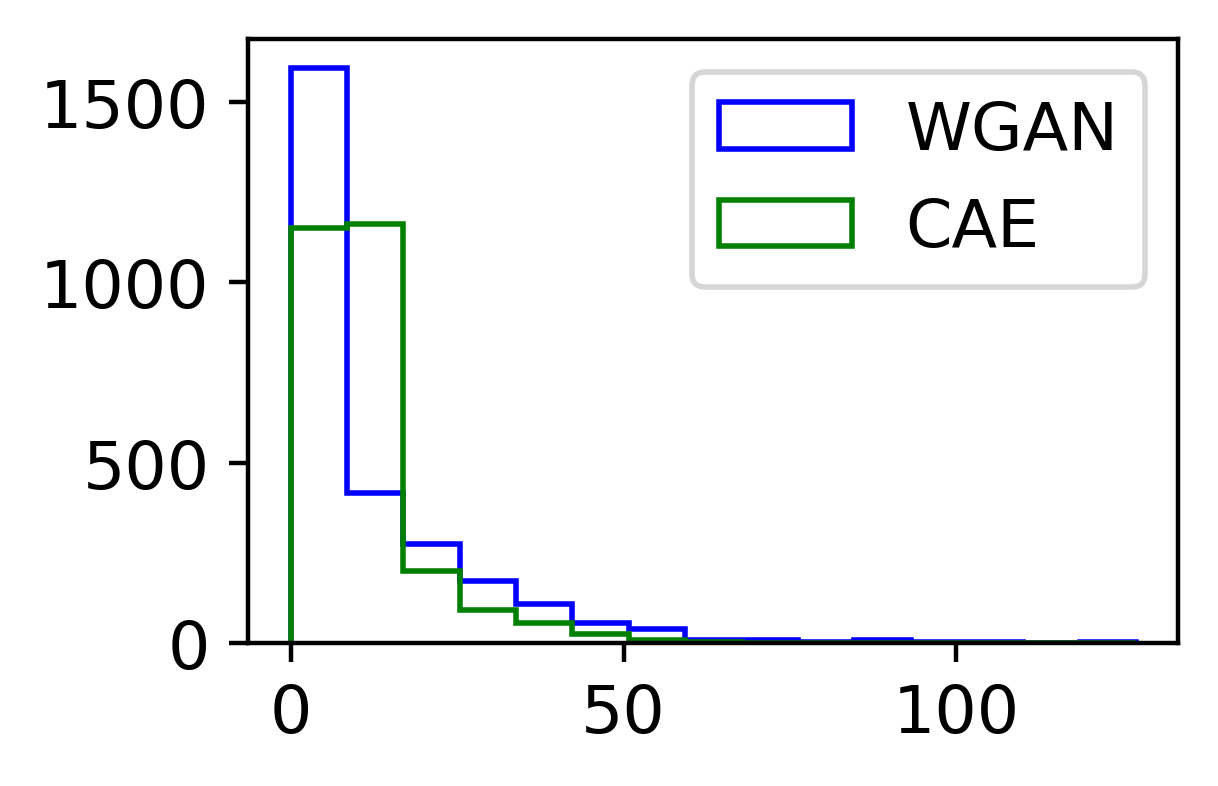

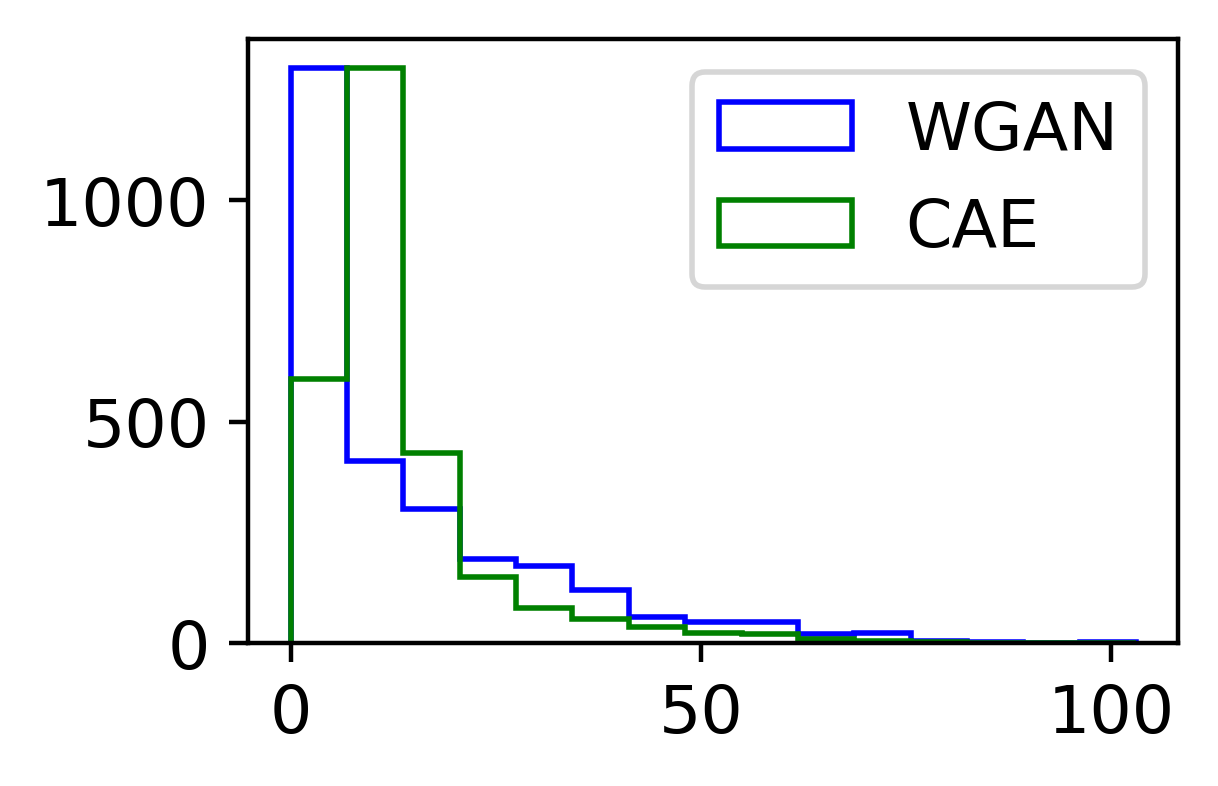

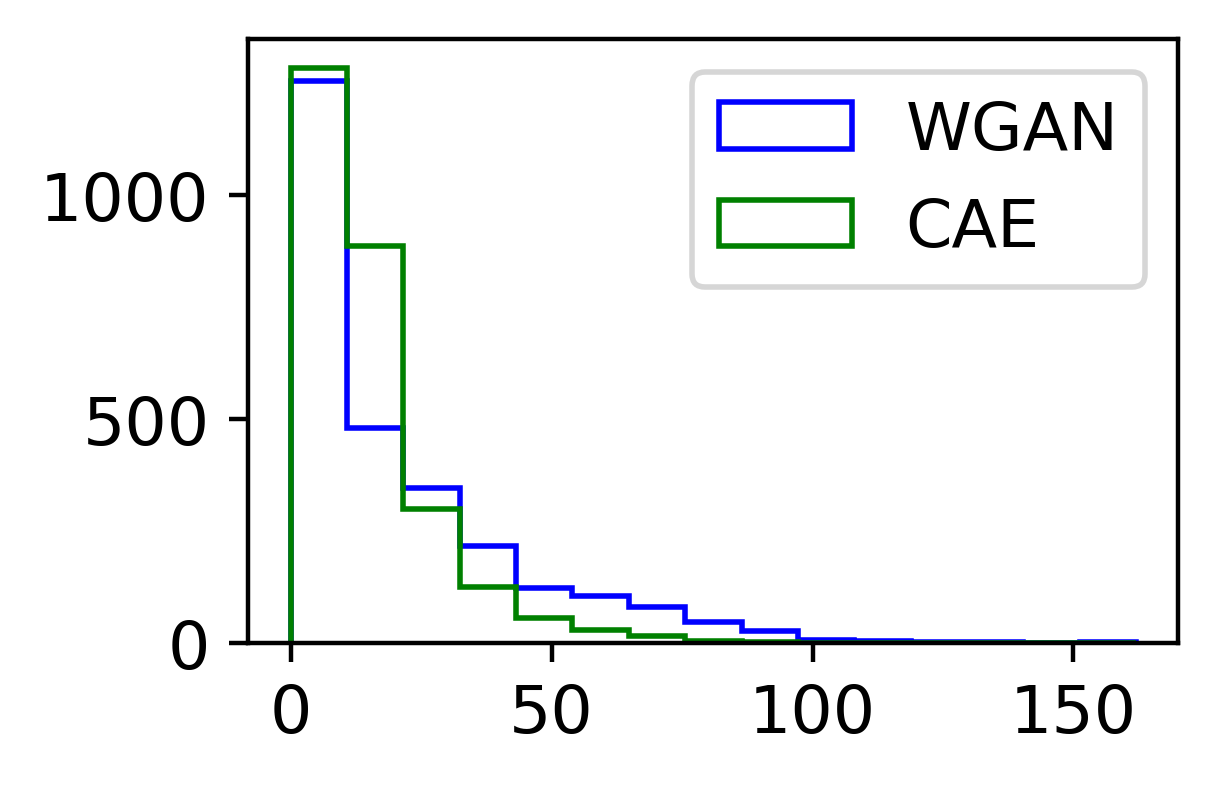

In [26]:
npix = 30
for idx in idxs_recon:
    print("idx", idx)
    corner = res['residuals'][idx][-30:,-30:,:]
    print("WGAN:", np.sum(corner))
    corner_ae = aeres['residuals'][idx][-30:,-30:,:]
    print("CAE:", np.sum(corner_ae))
    plt.figure(figsize=(3,2))
    bins = plt.hist(corner.flatten(),histtype='step', color='blue', bins=15, label='WGAN')
    plt.hist(corner_ae.flatten(),histtype='step', color='green', bins=bins[1], label='CAE')
    plt.legend()

idx 416048
WGAN: 20543
CAE: 24824
idx 5835
WGAN: 18536
CAE: 29764
idx 585287
WGAN: 19370
CAE: 51975


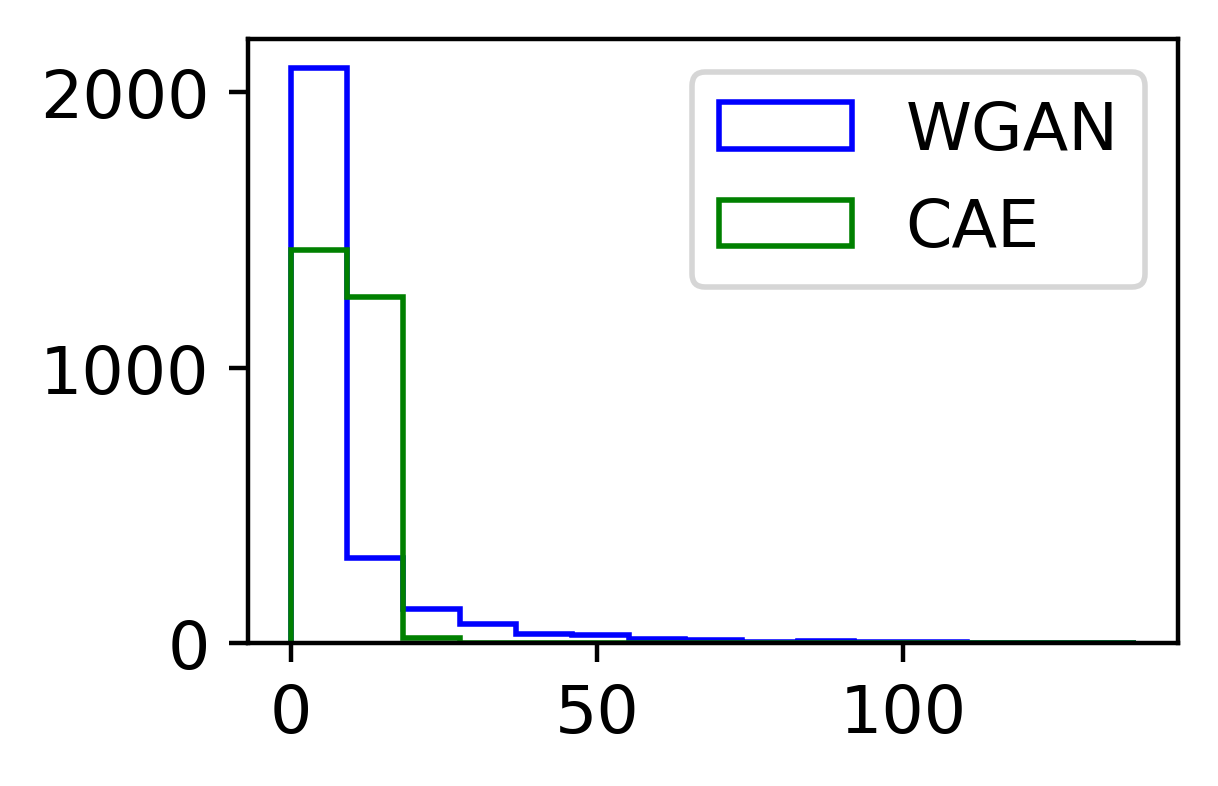

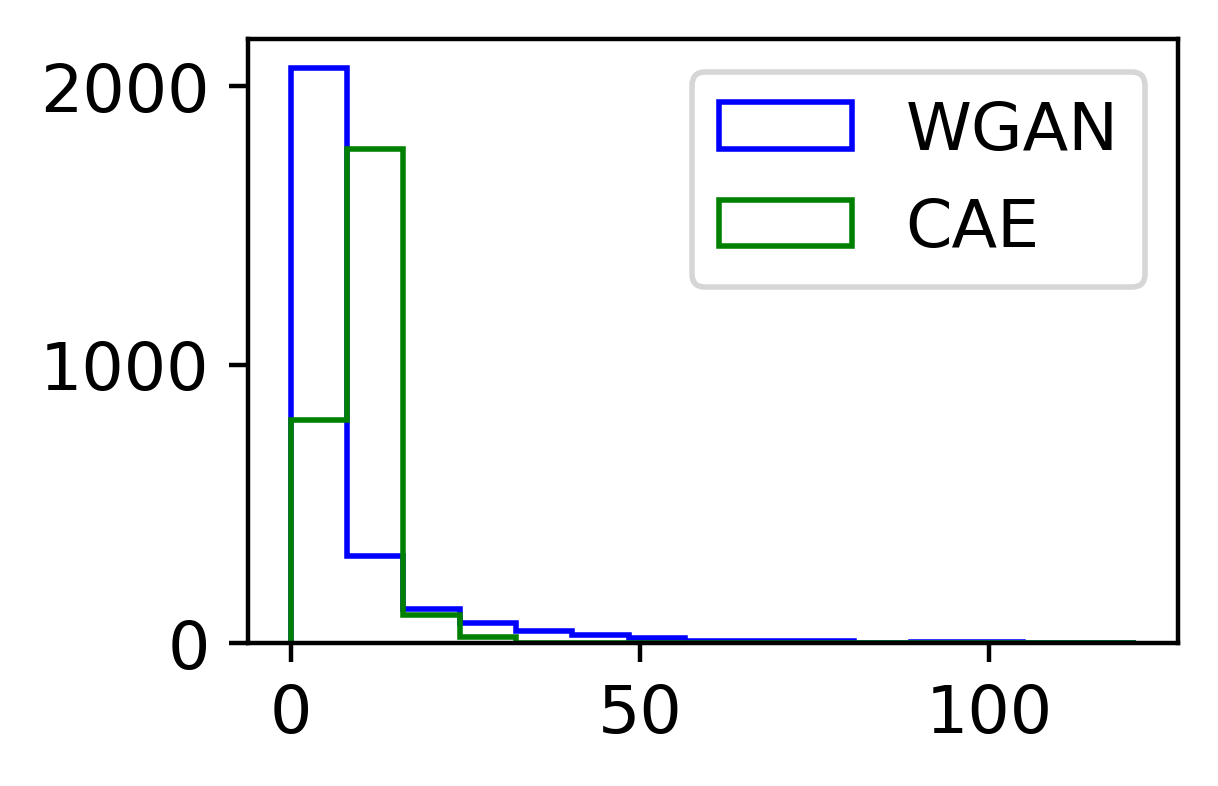

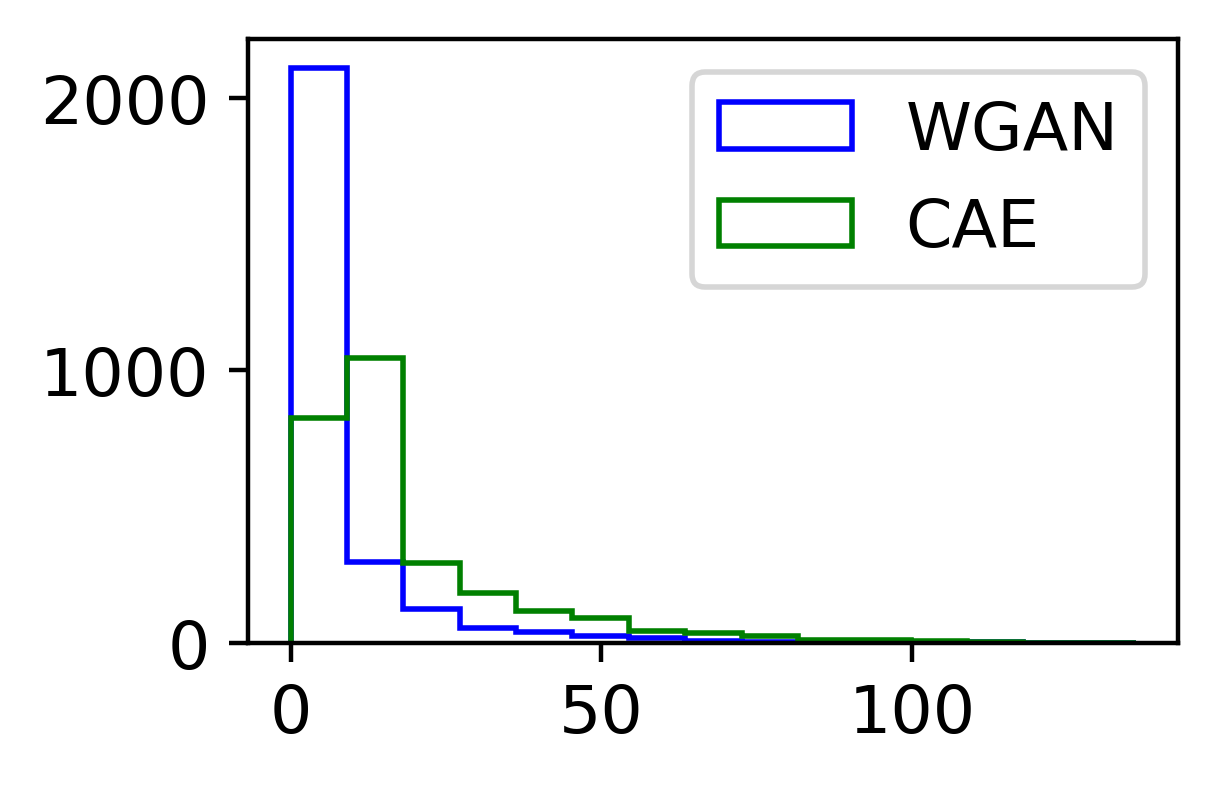

In [27]:
npix = 30
for idx in idxs_recon:
    print("idx", idx)
    corner = res['reconstructed'][idx][-30:,-30:,:]
    print("WGAN:", np.sum(corner))
    corner_ae = aeres['decodeds'][idx][-30:,-30:,:]
    print("CAE:", np.sum(corner_ae))
    plt.figure(figsize=(3,2))
    bins = plt.hist(corner.flatten(),histtype='step', color='blue', bins=15, label='WGAN')
    plt.hist(corner_ae.flatten(),histtype='step', color='green', bins=bins[1], label='CAE')
    plt.legend()

Full

idx 416048
WGAN: 19370
CAE: 51975
idx 5835
WGAN: 19370
CAE: 51975
idx 585287
WGAN: 19370
CAE: 51975


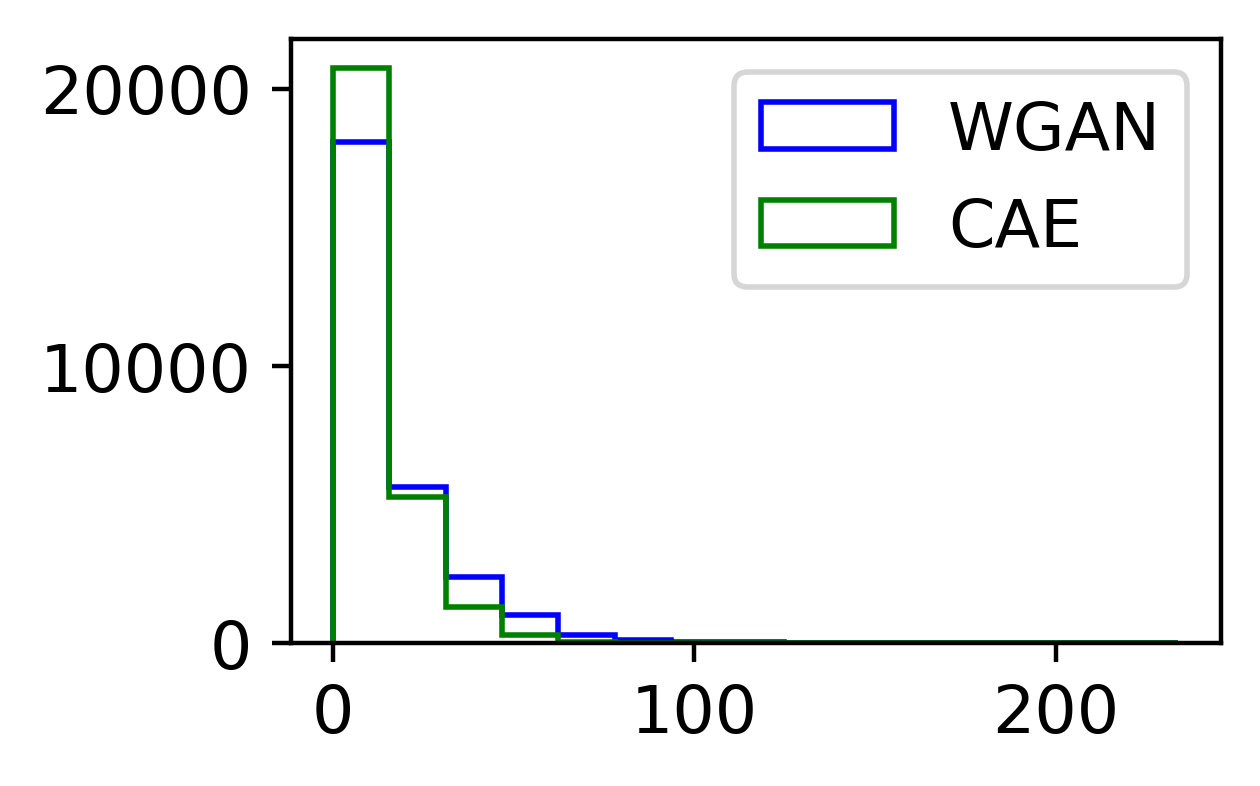

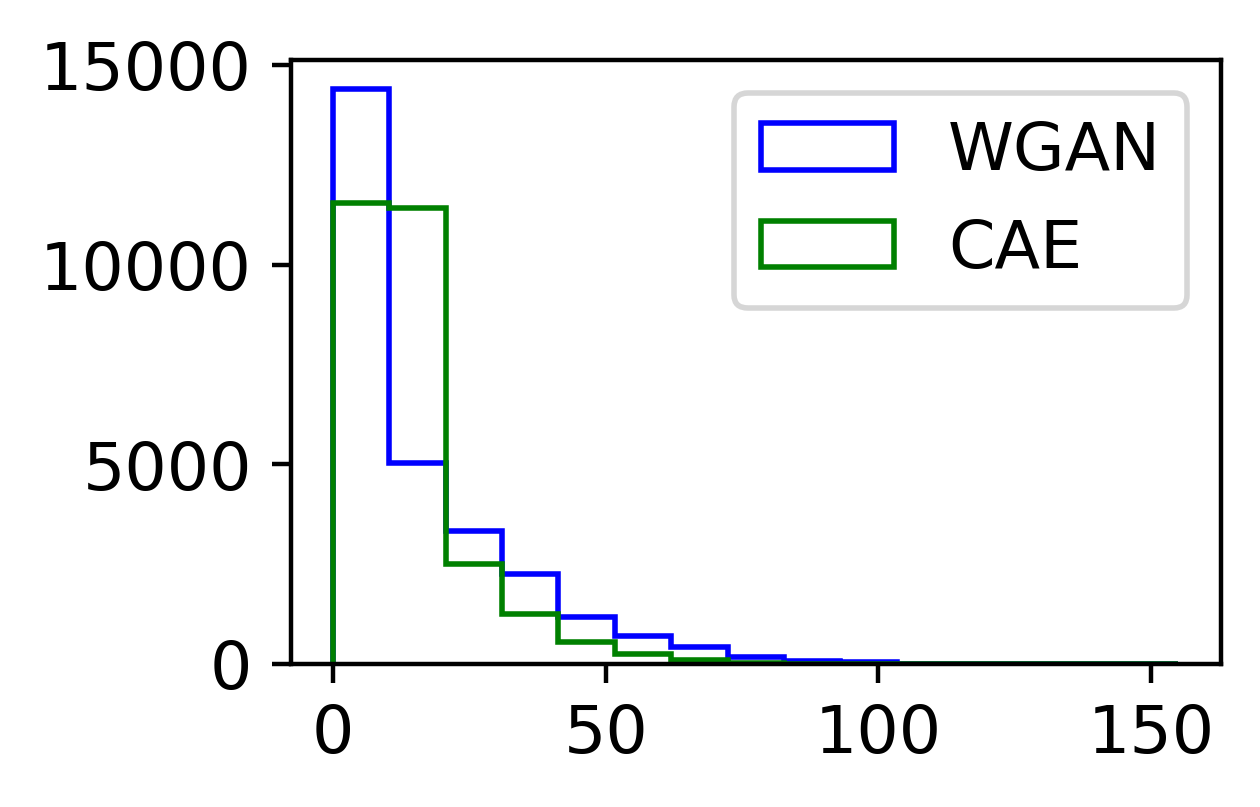

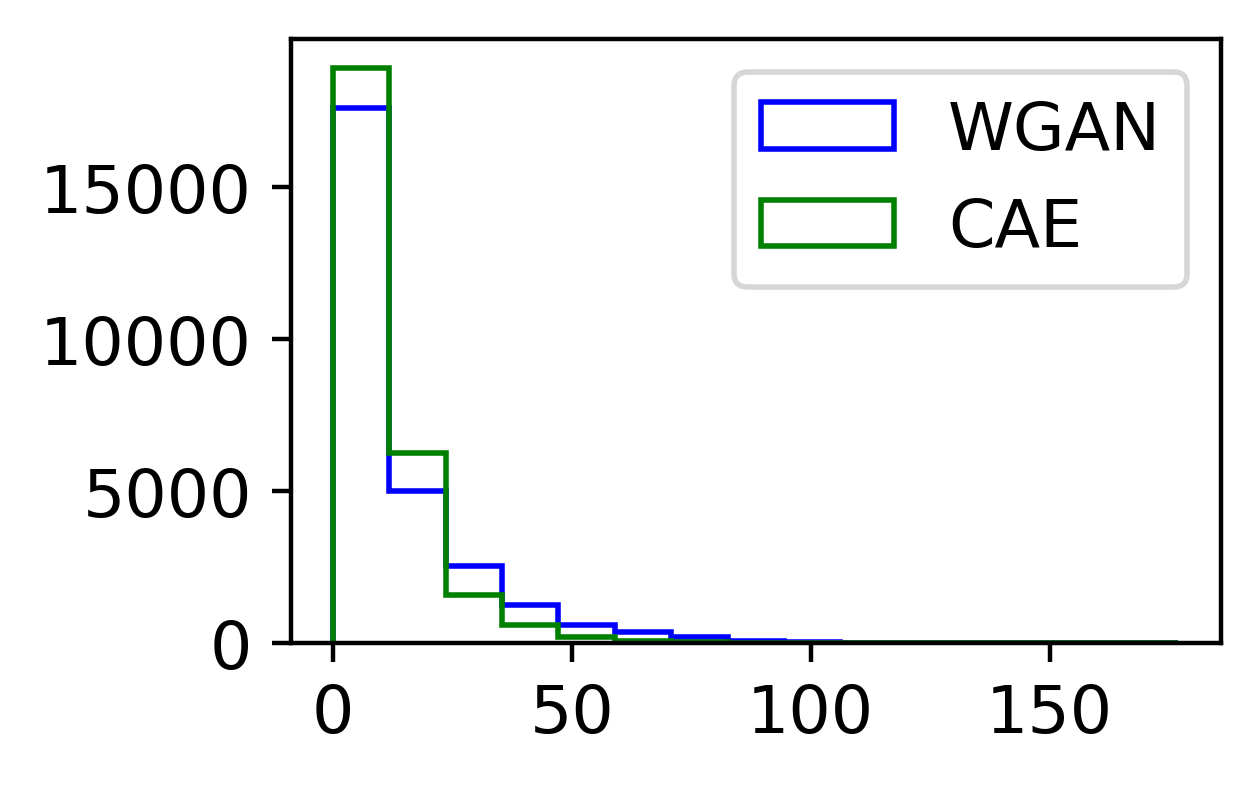

In [28]:
npix = 30
for idx in idxs_recon:
    print("idx", idx)
    cut = res['residuals'][idx]
    print("WGAN:", np.sum(corner))
    cut_ae = aeres['residuals'][idx]
    print("CAE:", np.sum(corner_ae))
    plt.figure(figsize=(3,2))
    bins = plt.hist(cut.flatten(),histtype='step', color='blue', bins=15, label='WGAN')
    plt.hist(cut_ae.flatten(),histtype='step', color='green', bins=bins[1], label='CAE')
    plt.legend()

Center

idx 416048
WGAN: 19370
CAE: 51975
idx 5835
WGAN: 19370
CAE: 51975
idx 585287
WGAN: 19370
CAE: 51975


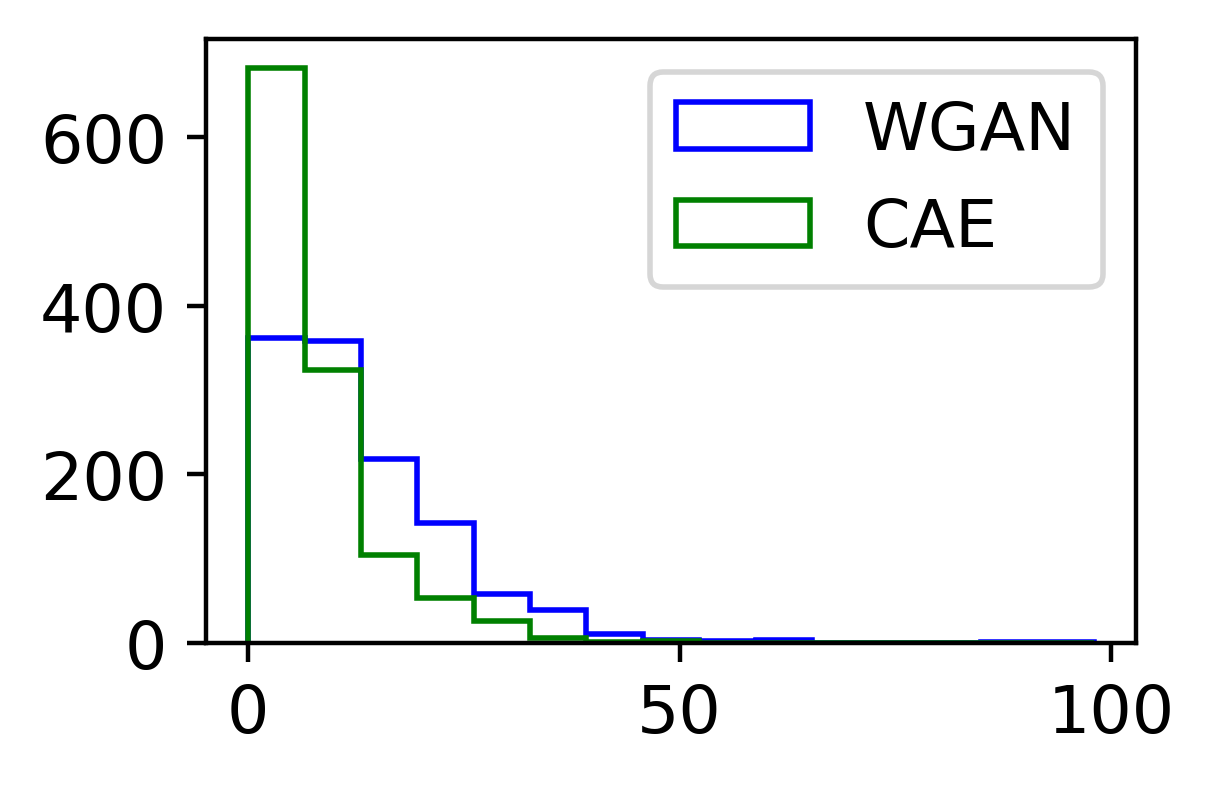

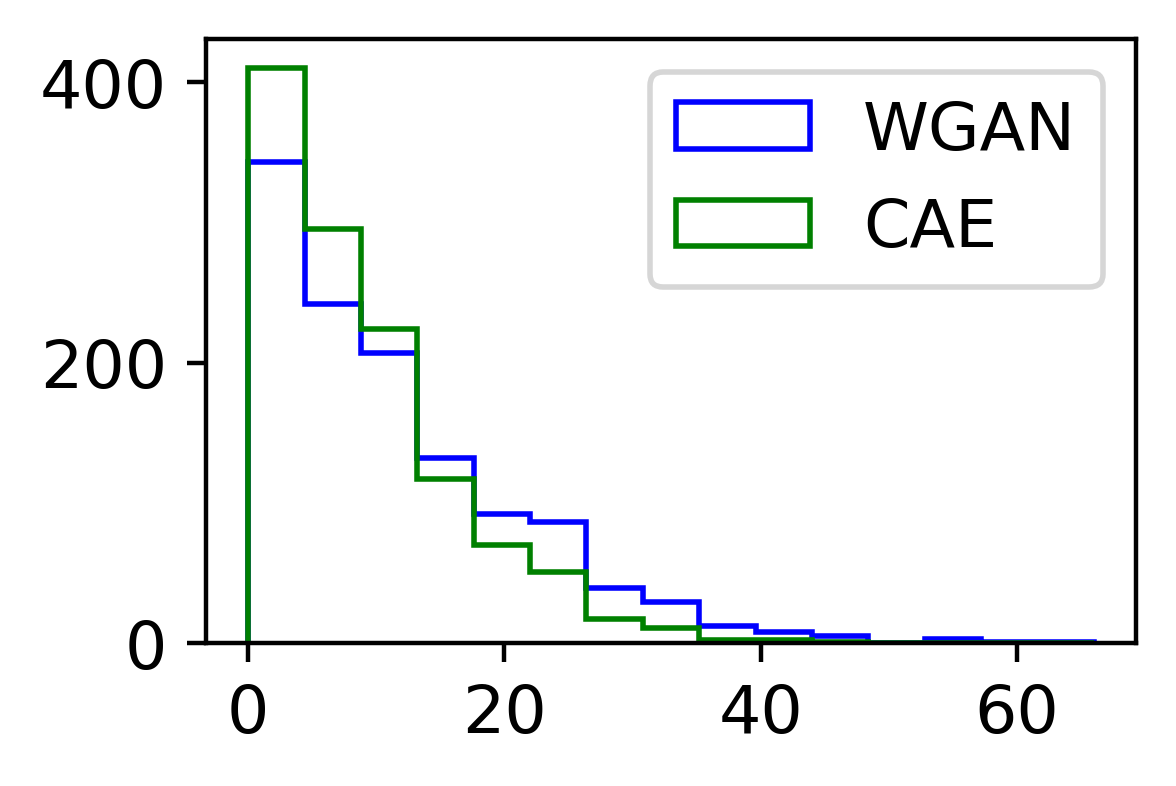

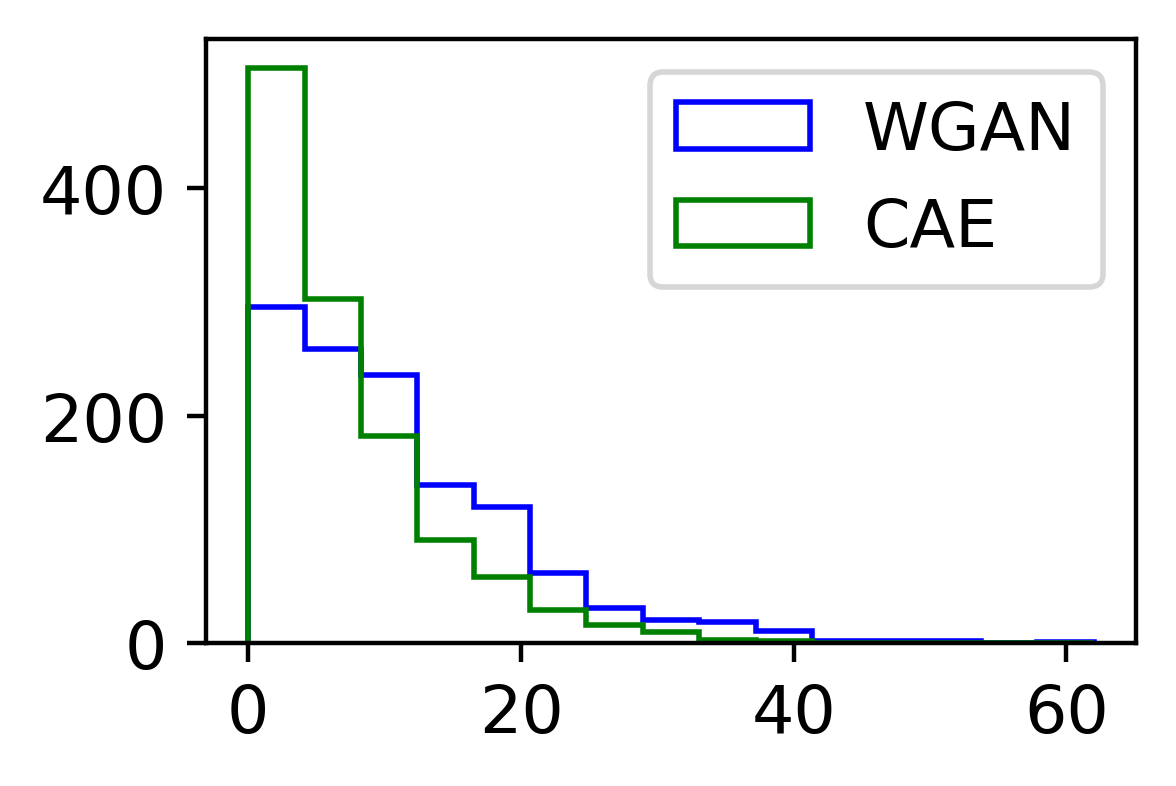

In [29]:
npix = 30
NSIDE=96
cl = int(NSIDE/2)-10
cr = int(NSIDE/2)+10
for idx in idxs_recon:
    print("idx", idx)
    cut = res['residuals'][idx][cl:cr, cl:cr, :]
    print("WGAN:", np.sum(corner))
    cut_ae = aeres['residuals'][idx][cl:cr, cl:cr, :]
    print("CAE:", np.sum(corner_ae))
    plt.figure(figsize=(3,2))
    bins = plt.hist(cut.flatten(),histtype='step', color='blue', bins=15, label='WGAN')
    plt.hist(cut_ae.flatten(),histtype='step', color='green', bins=bins[1], label='CAE')
    plt.legend()

In [30]:
resid_ae = aeres['residuals'][idx]
ae_score = aeres['ae_anomaly_scores'][idx]
print(np.sum(resid_ae)/255., ae_score)

1170.0862745098038 1223.9862
